# Plotting box size of the subjects over time for the Box the Jet workflow. Sorted by SOL/ HEK event
## Need: aggregator files, subjects_Tc.csv (or T3), SOL_Tc_stats.csv (or T3) and exports file made in Find_export_jetclusters.ipynb
This jupyter notebook plots the results of the Box the Jet task, the Jet size over the subjects of the jet clusters per SOL/HEK event  
The plotting will add jets that cover multiple subject as red lines for the height and green lines for the width.   
Single subject jets will have a black dotted with dashed lines for their height and width. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

import datetime
from matplotlib.dates import DateFormatter

from aggregation import Aggregator
from aggregation import SOL
from aggregation import json_import_list
from aggregation import MetaFile

%matplotlib inline

In [6]:
aggregator = Aggregator('reductions/point_reducer_hdbscan_box_the_jets.csv', 
                        'reductions/shape_reducer_dbscan_box_the_jets.csv')
aggregator.load_extractor_data('extracts/point_extractor_by_frame_box_the_jets.csv',
                               'extracts/shape_extractor_rotateRectangle_box_the_jets.csv')
sol = SOL('../Meta_data_subjects.json', aggregator)  
metafile= MetaFile('../Meta_data_subjects.json')

Jet_clusters=json_import_list('exports/Jet_clusters_3.0_2.0_testmeta.json')

The 452 JetCluster objects are imported from exports/Jet_clusters_3.0_2.0_testmeta.json.


In [7]:
path = 'SOL/SOL_Box_size/'
#check if folder for plots exists
isExist = os.path.exists(path)
if not isExist: 
  os.makedirs(path)
  print("SOL_Box directory is created")

SOL_Box directory is created


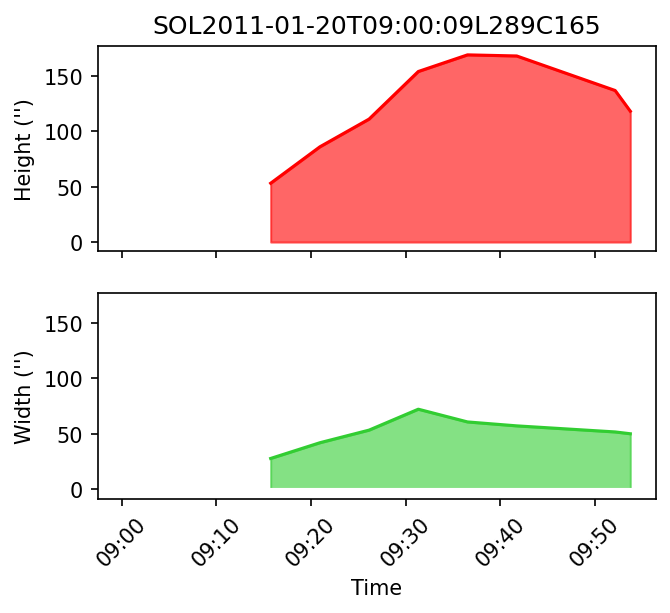

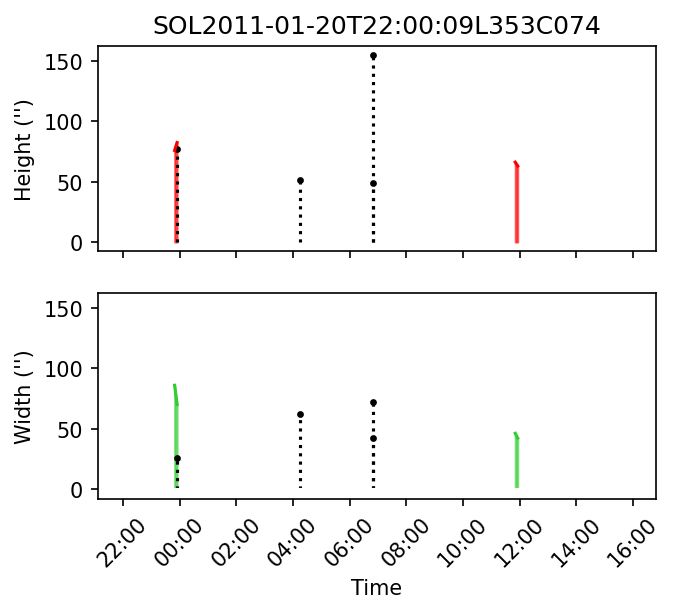

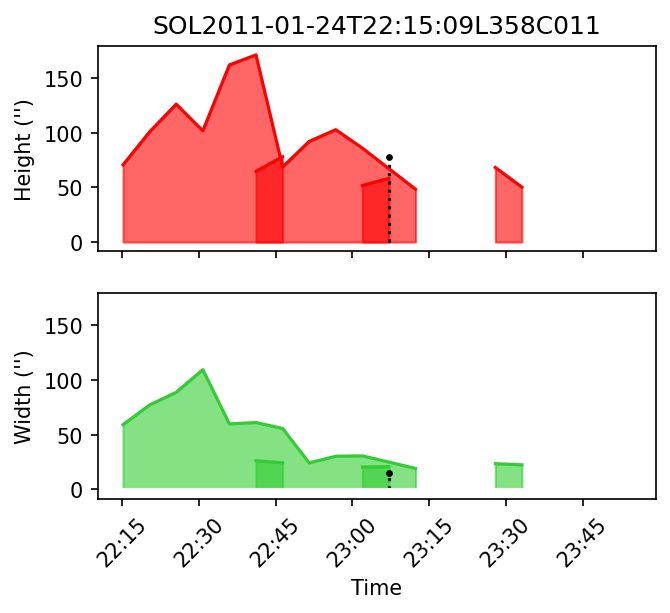

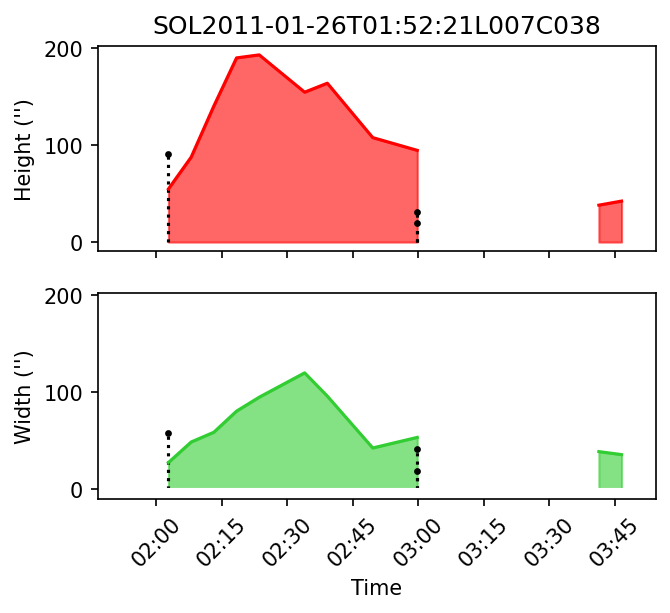

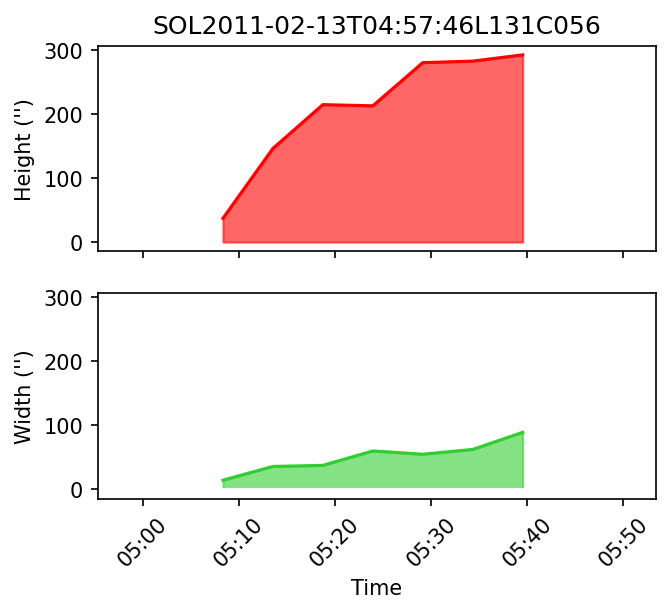

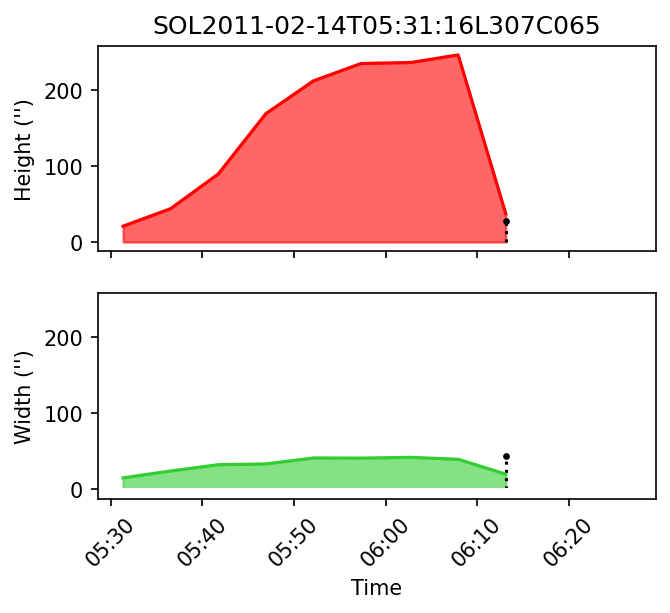

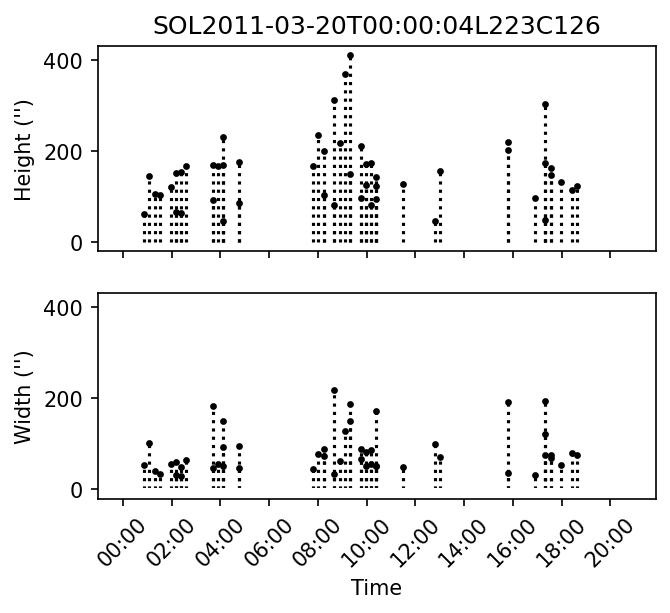

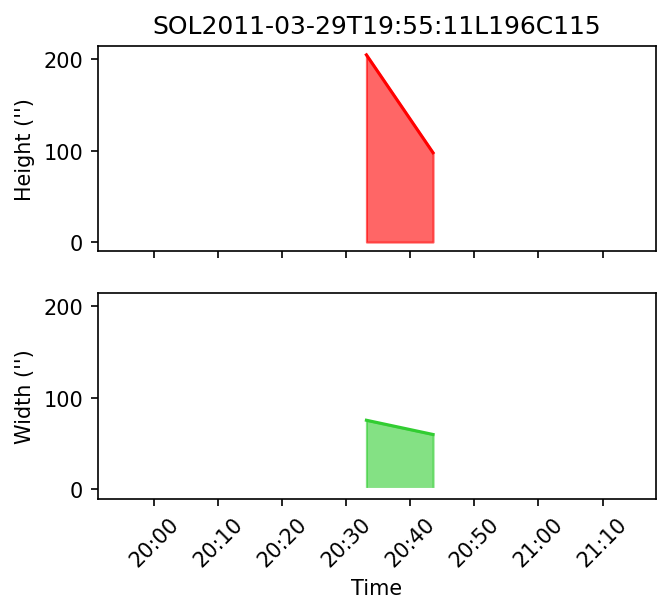

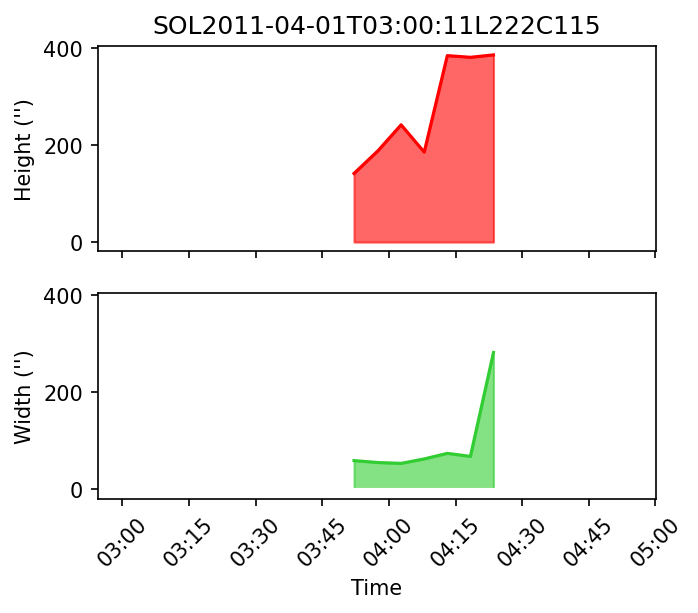

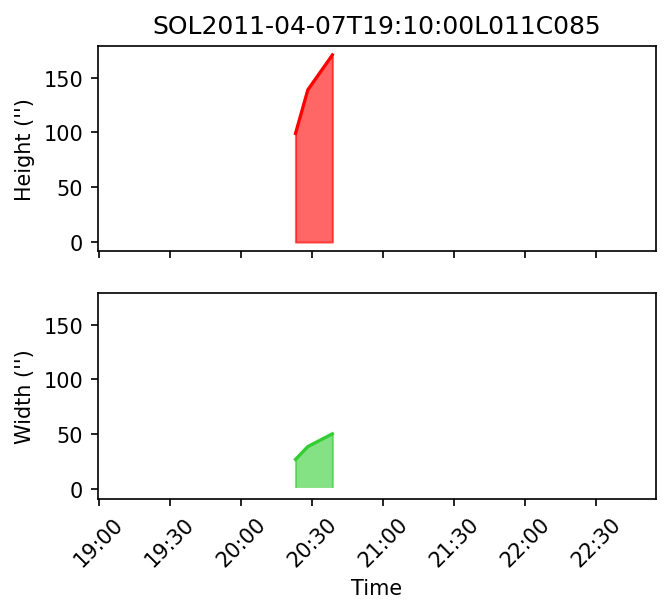

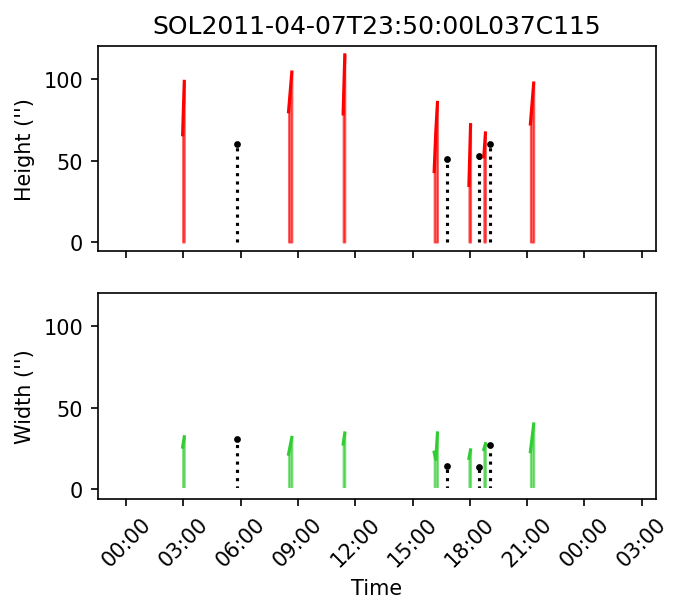

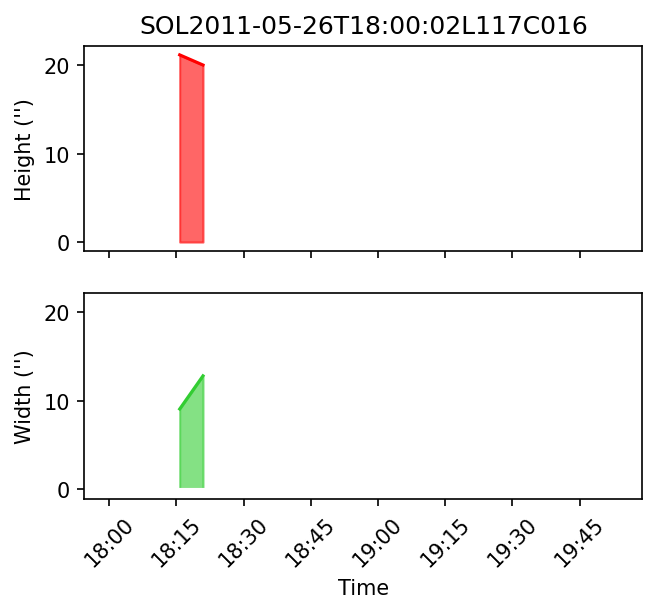

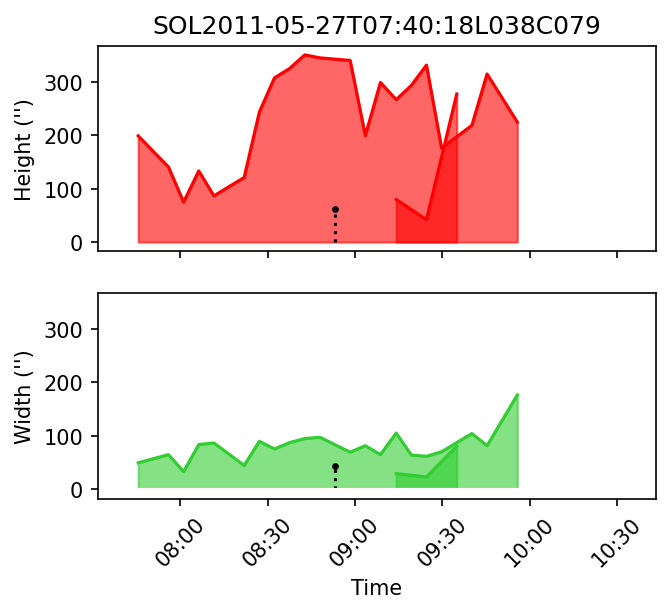

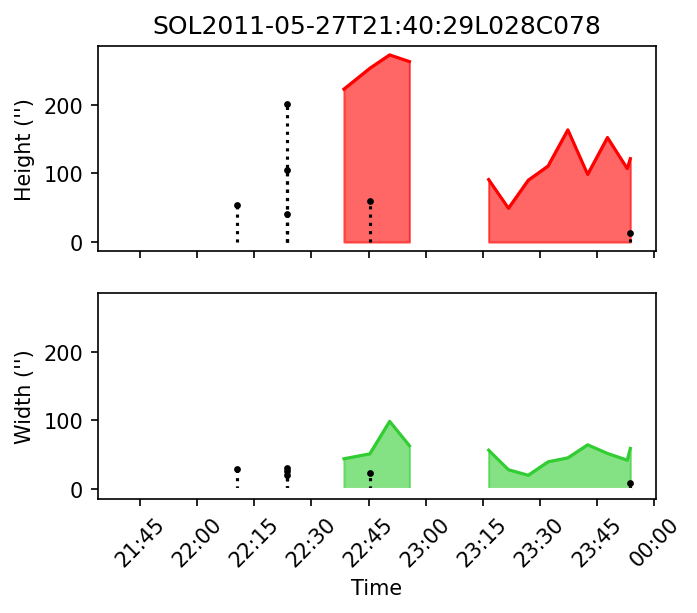

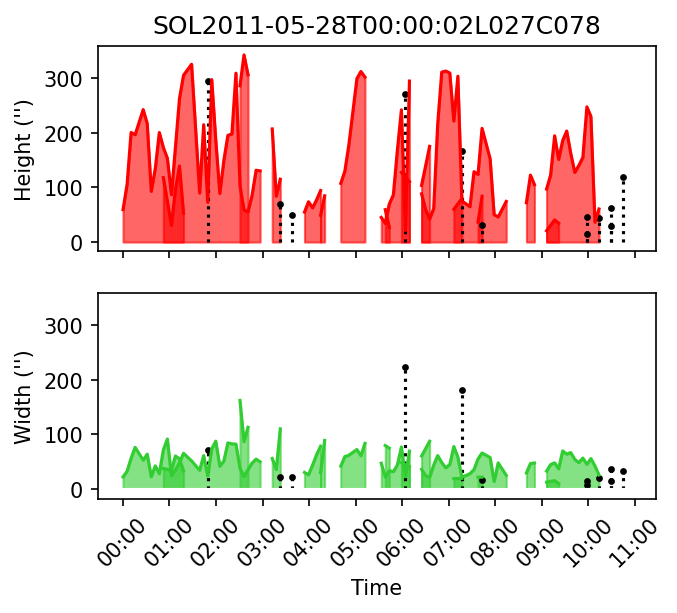

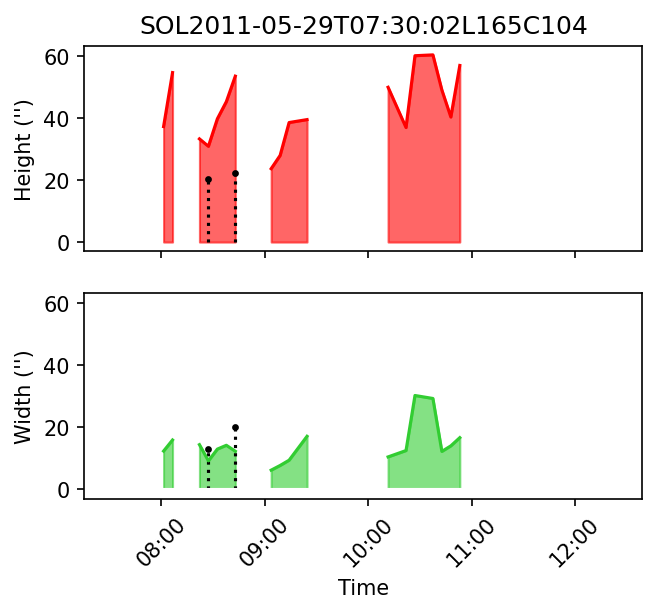

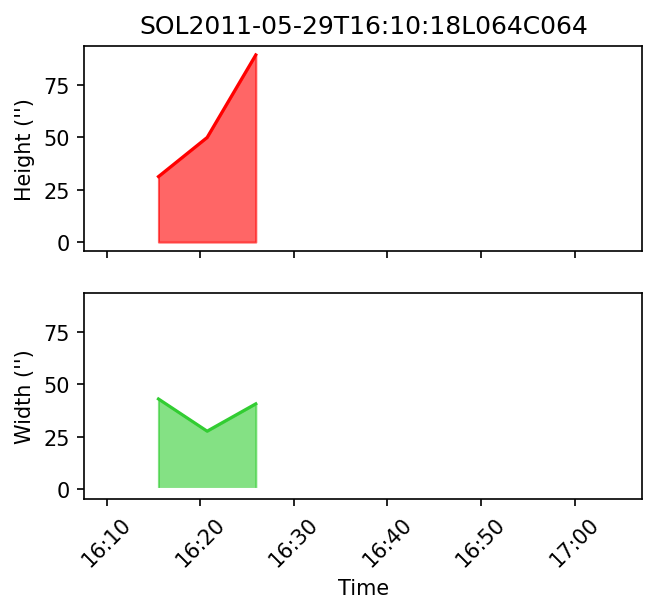

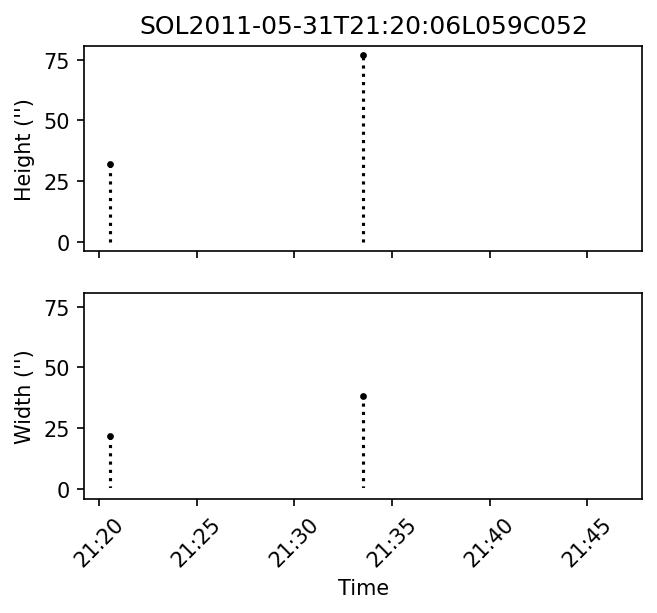

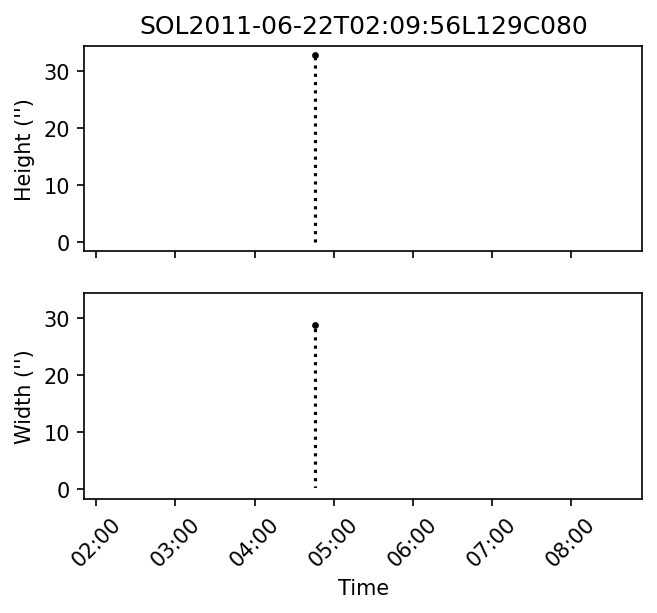

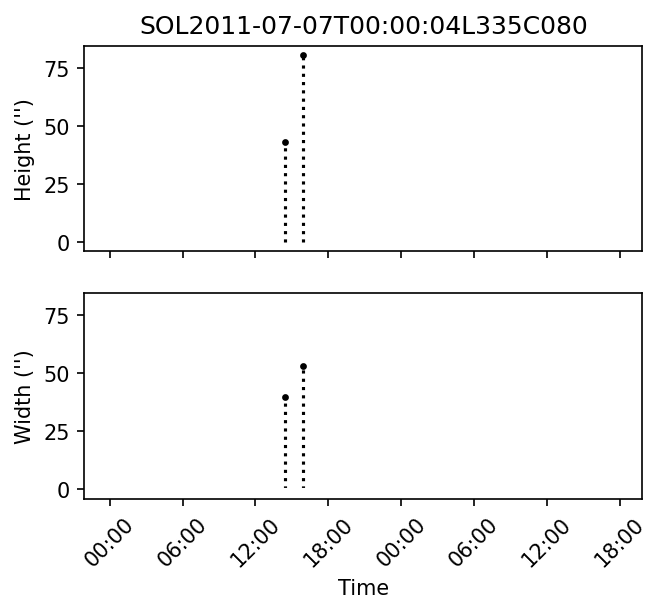

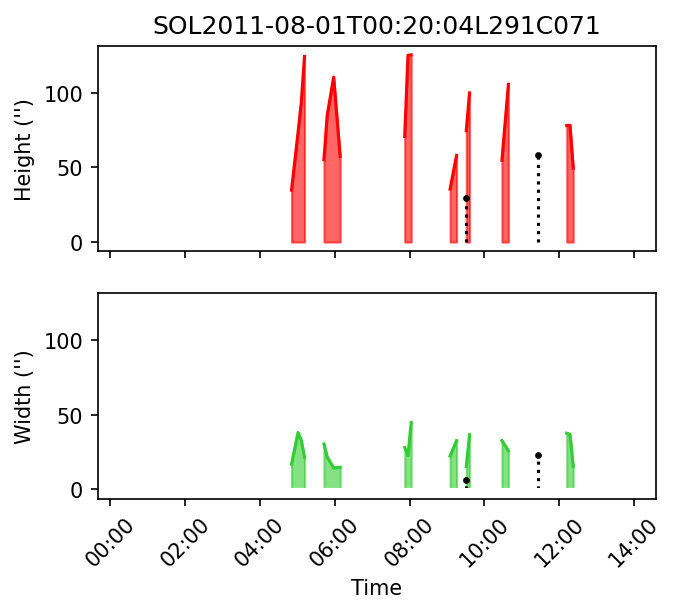

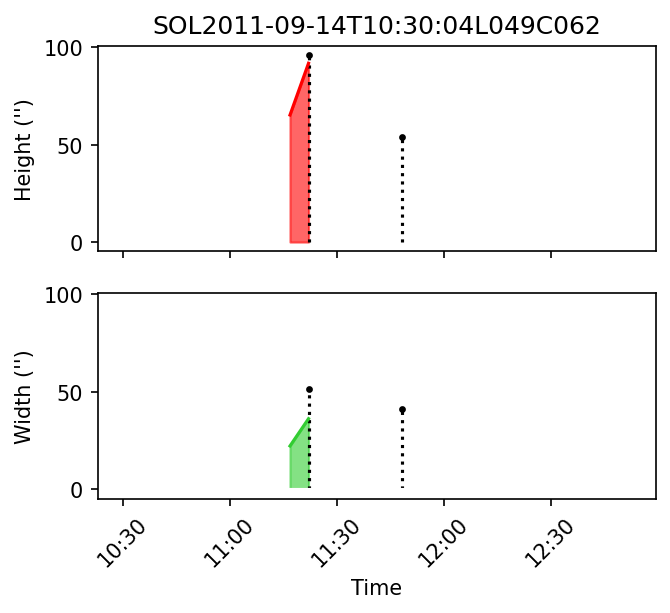

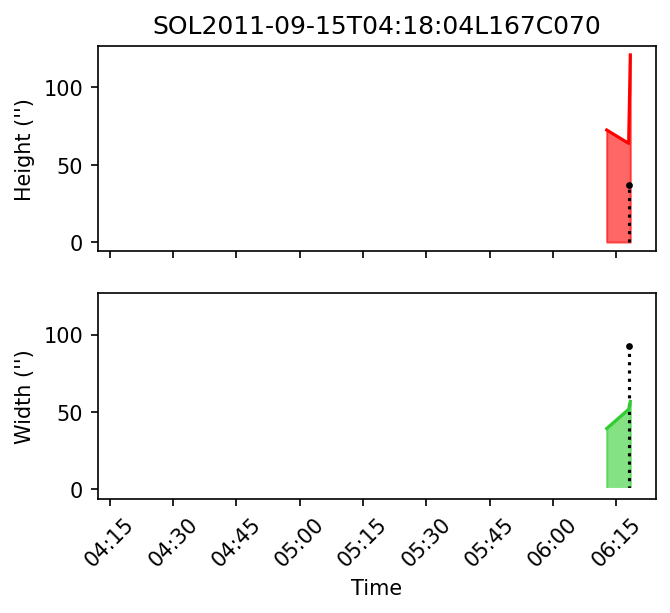

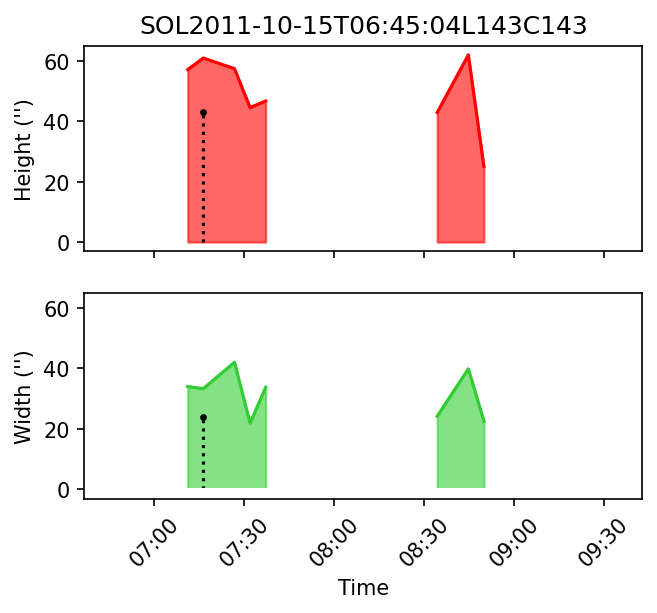

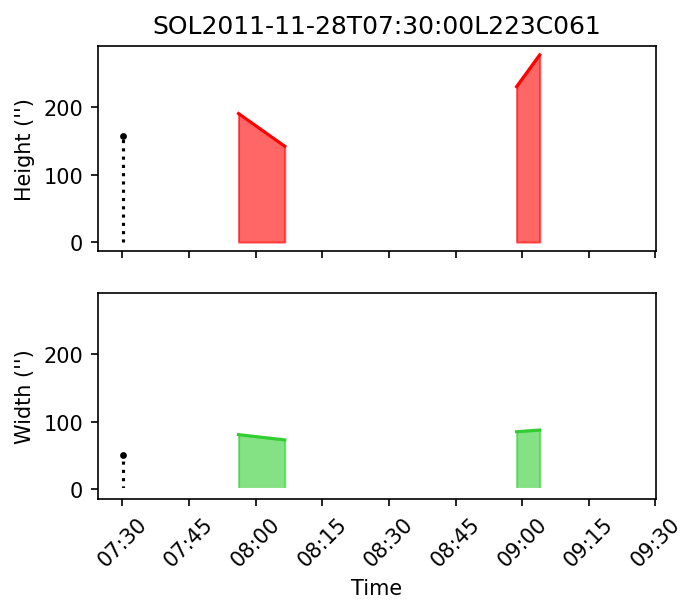

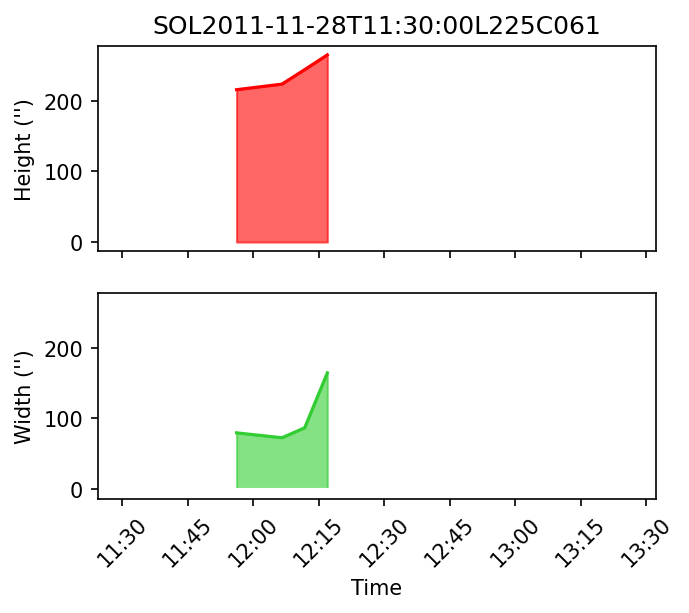

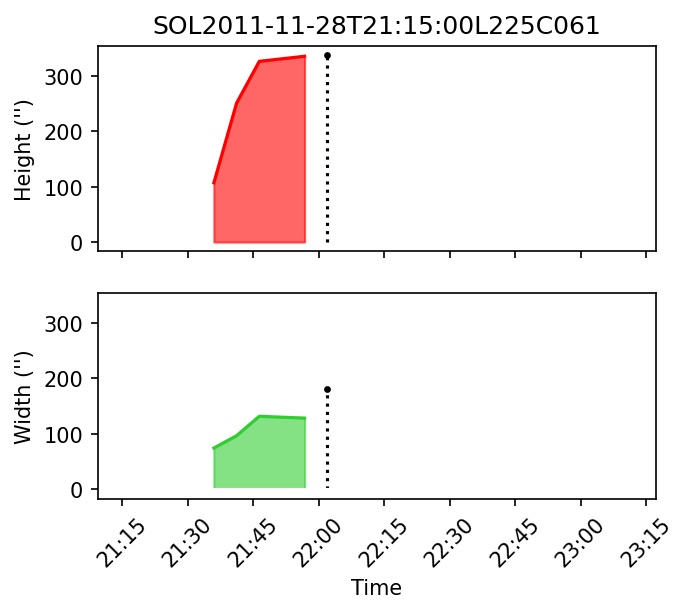

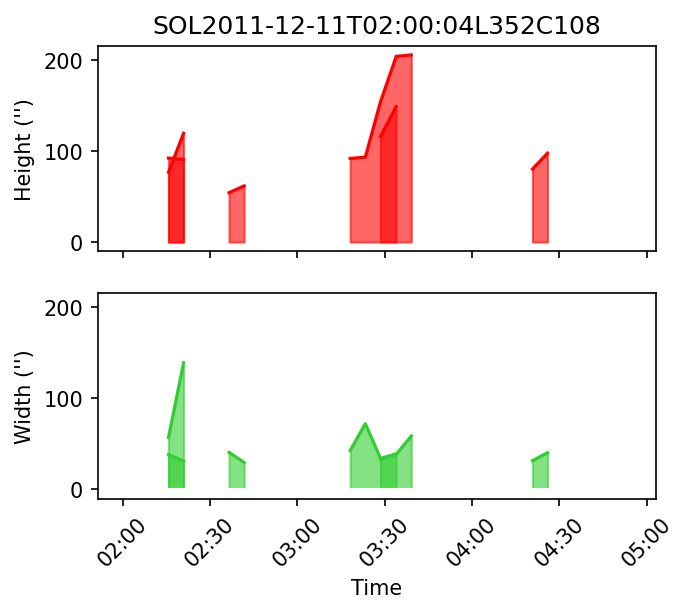

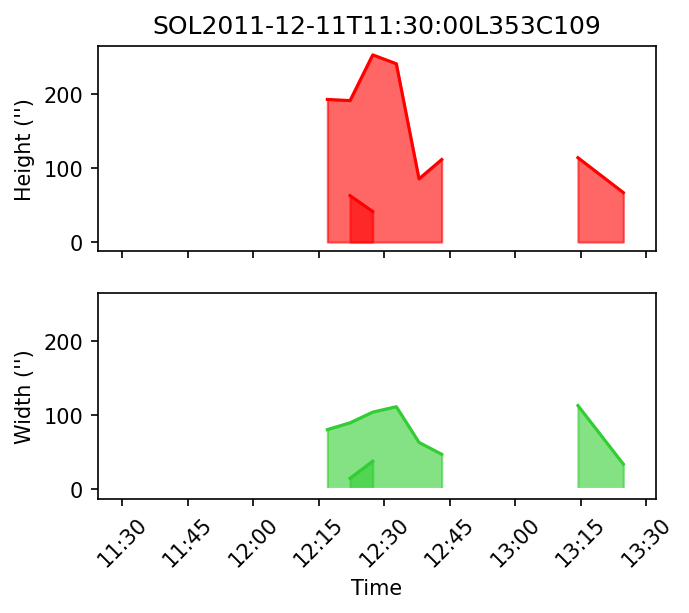

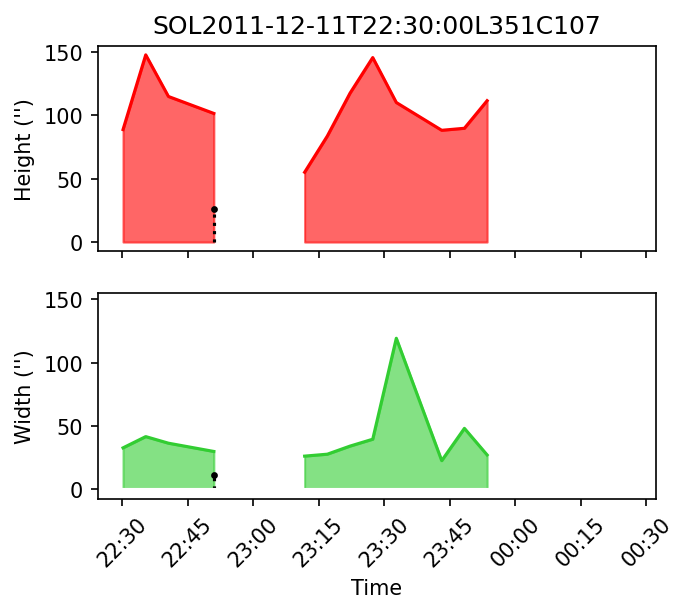

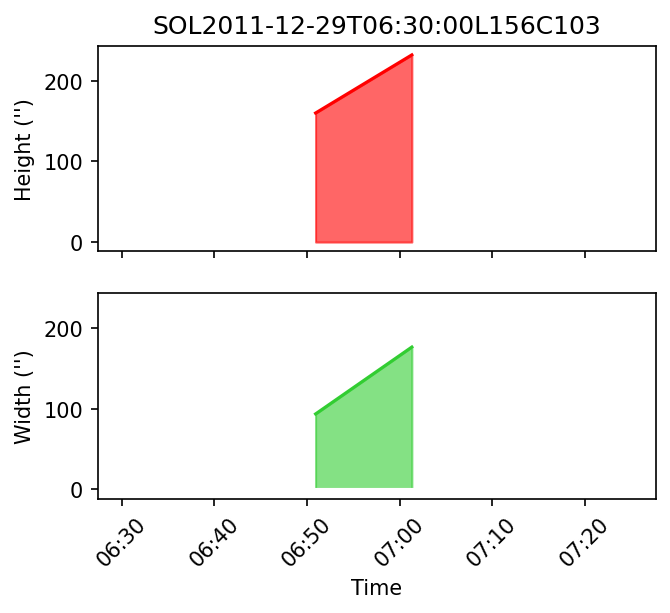

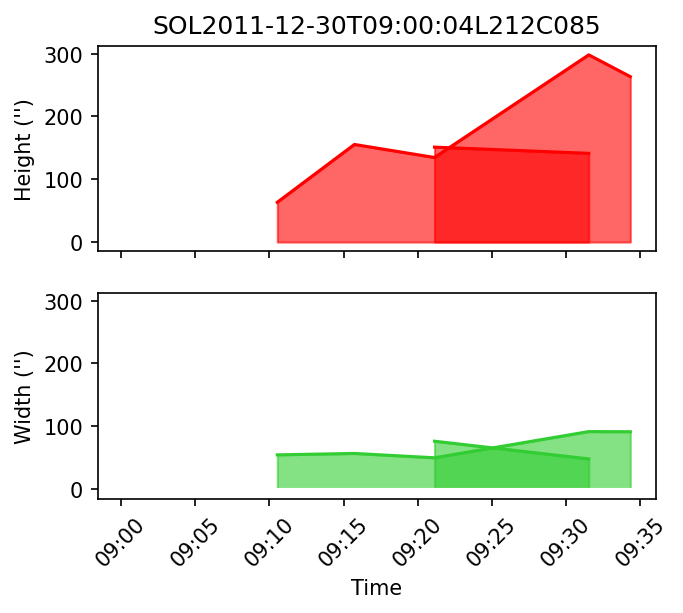

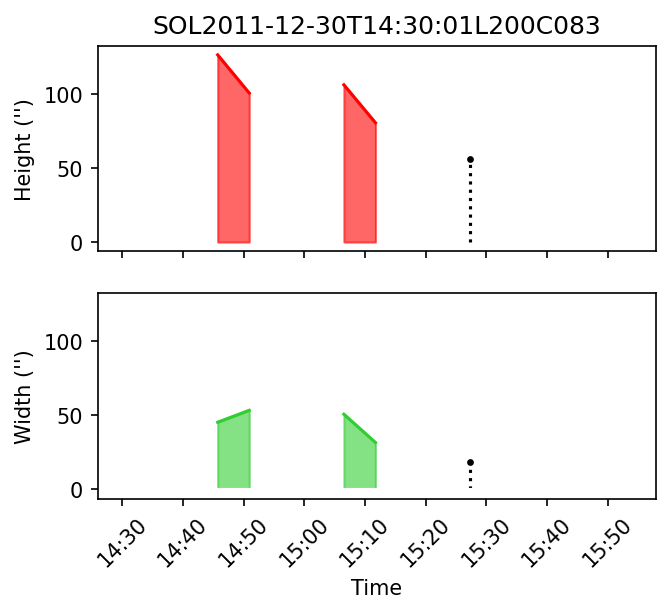

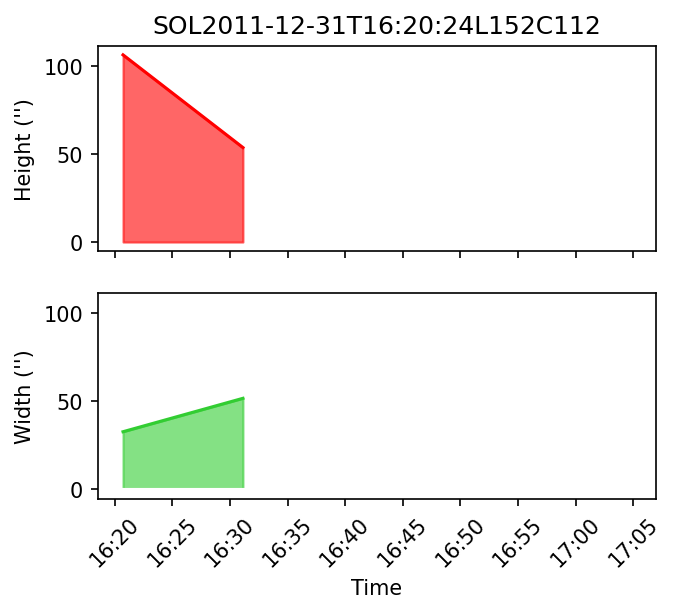

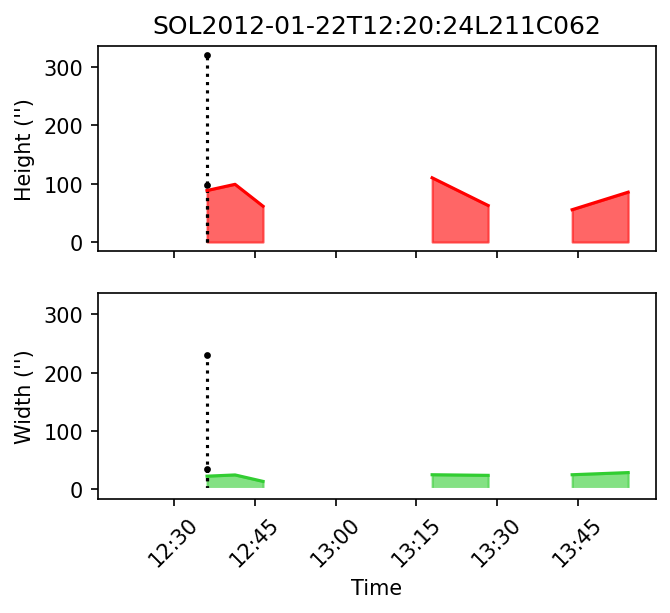

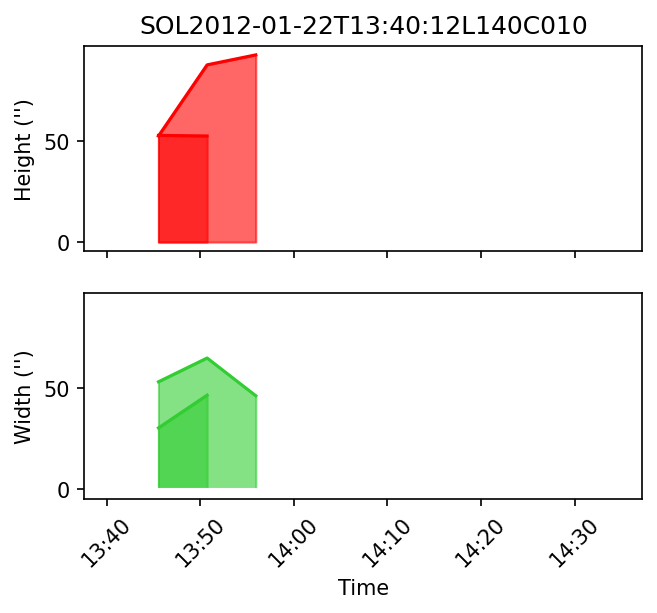

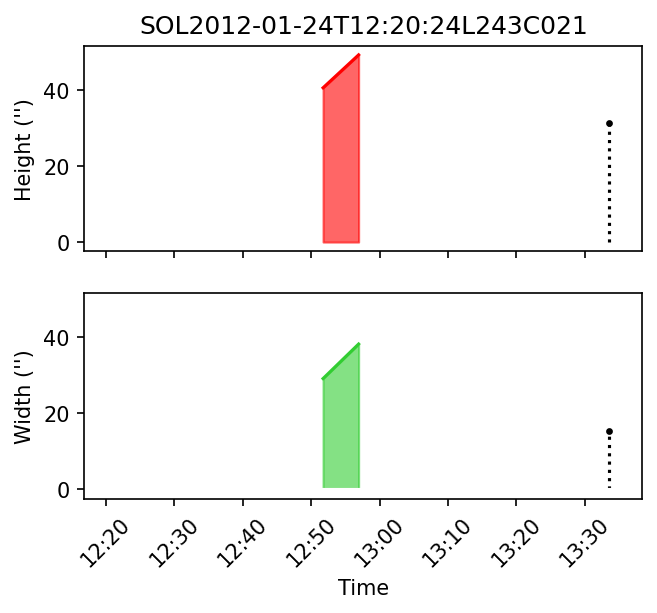

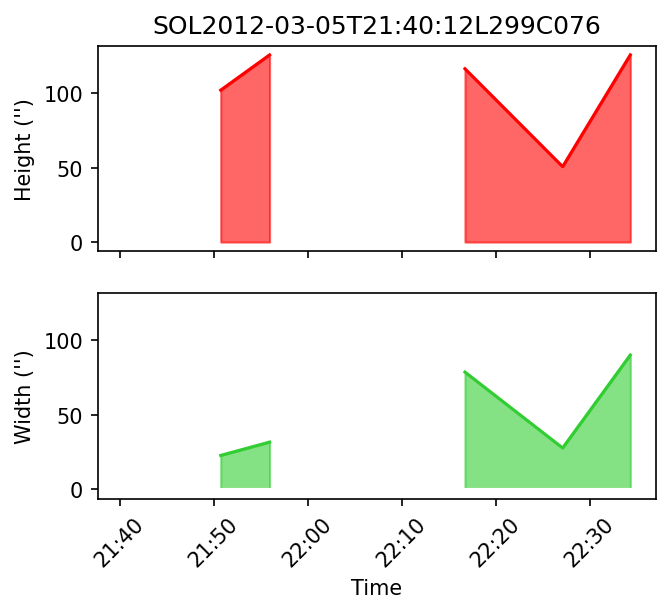

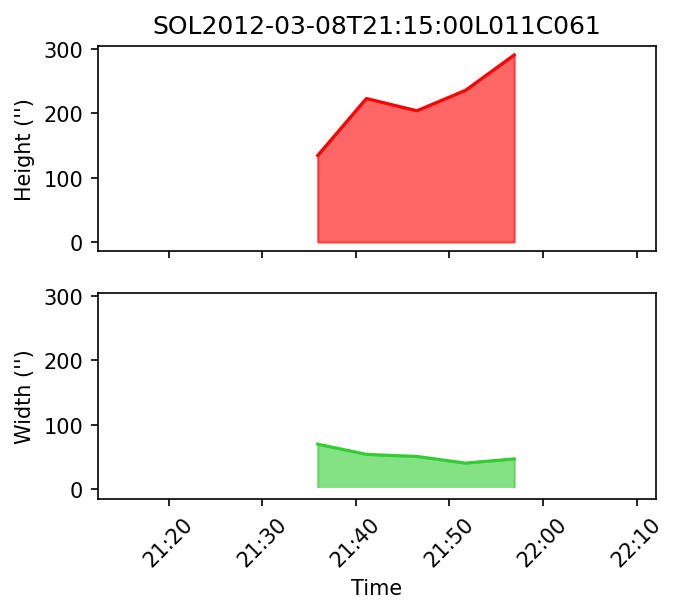

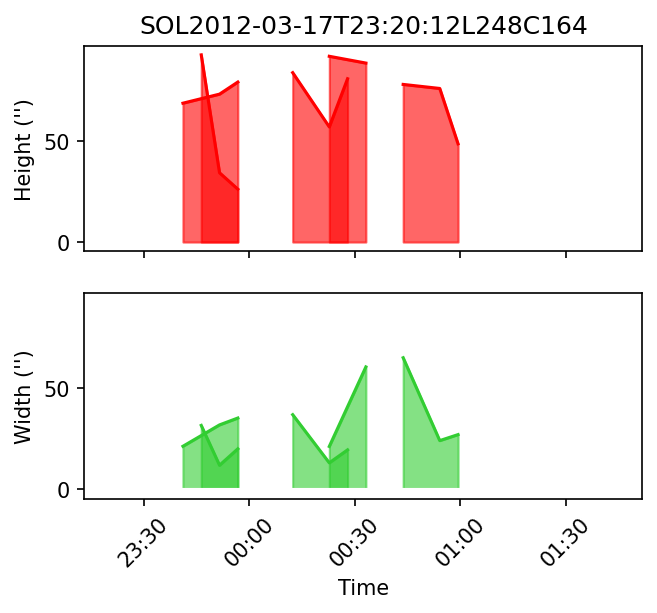

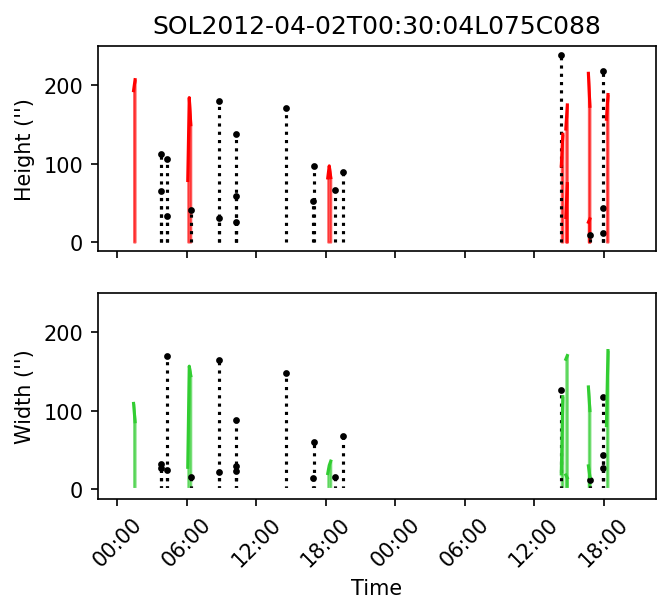

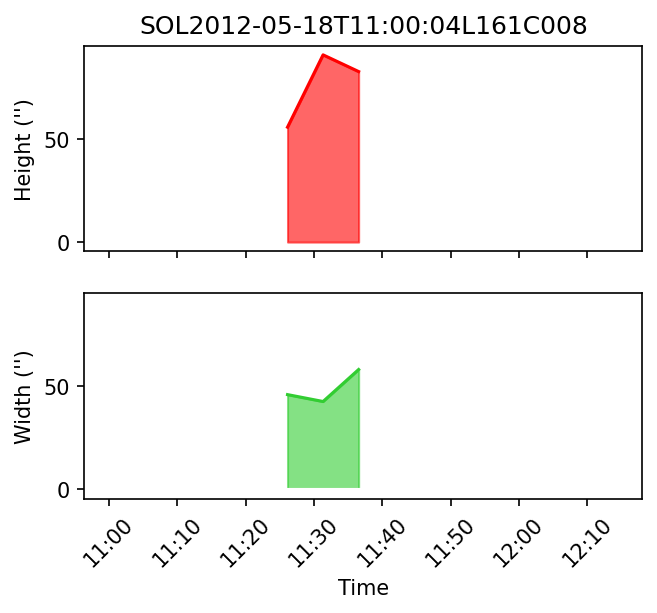

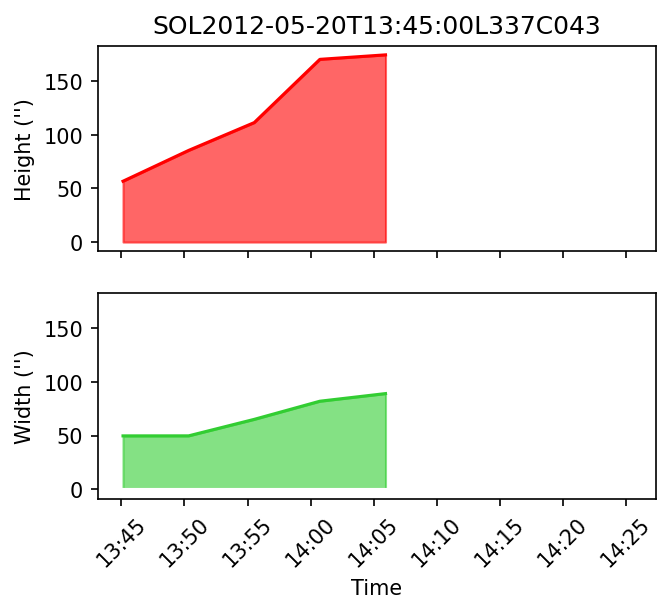

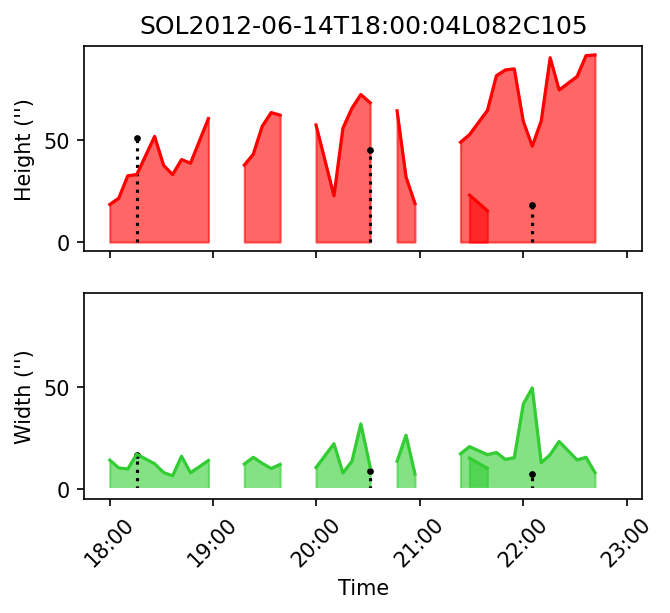

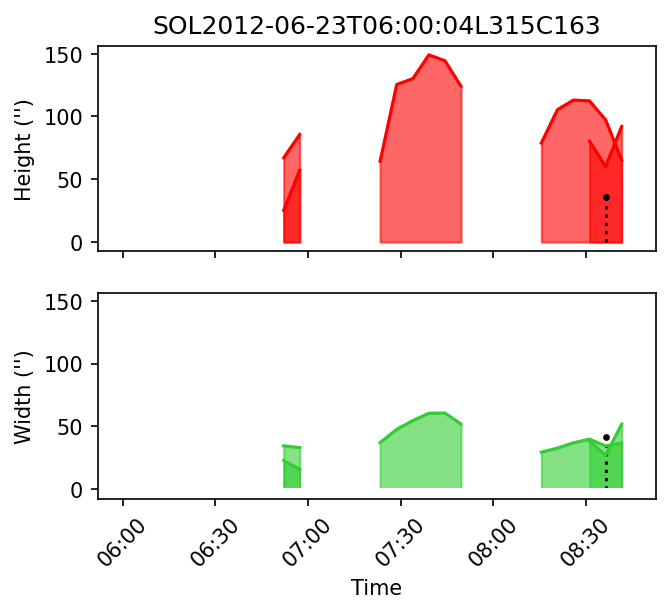

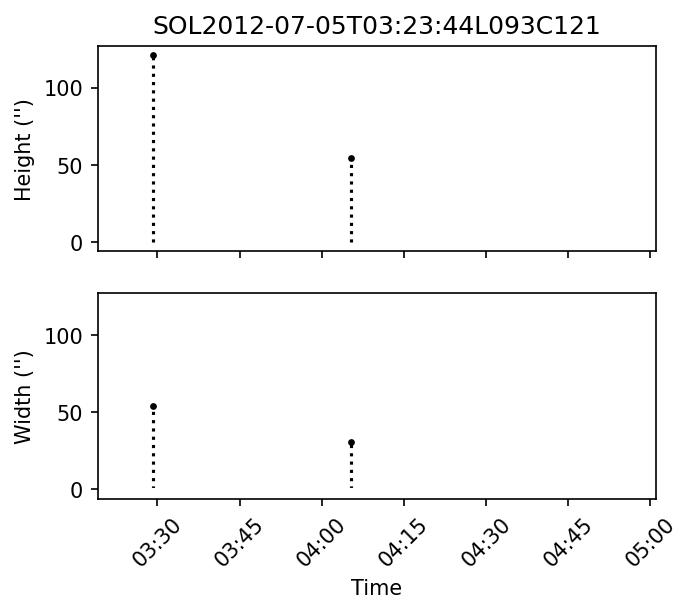

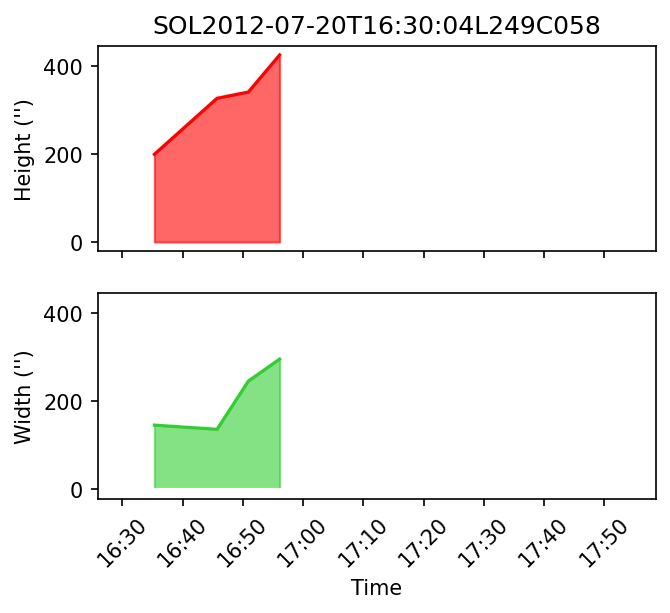

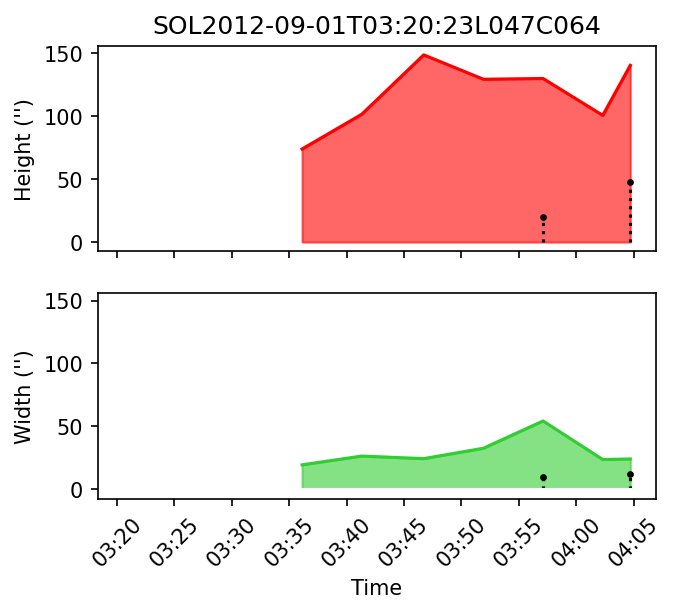

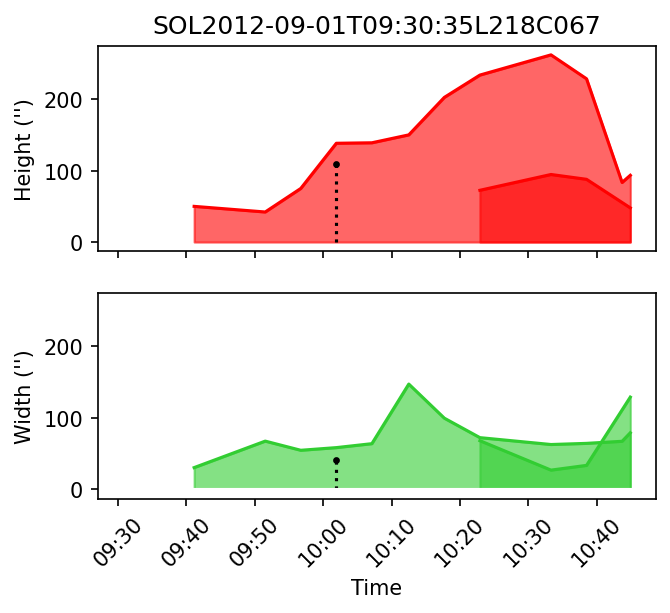

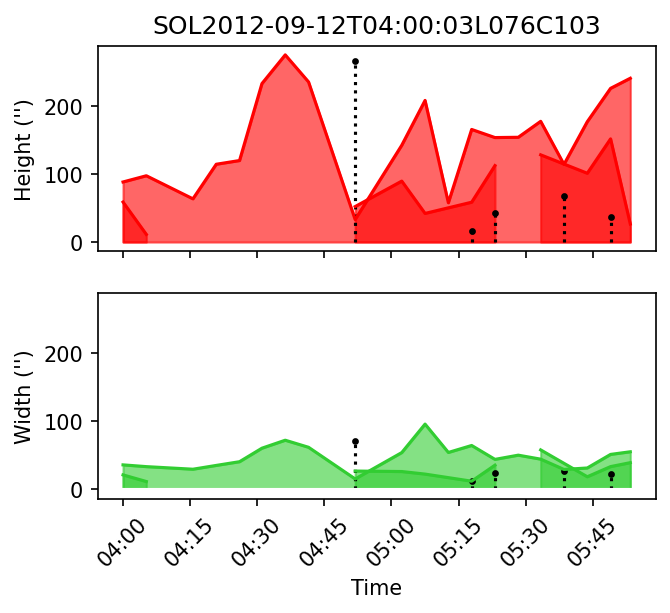

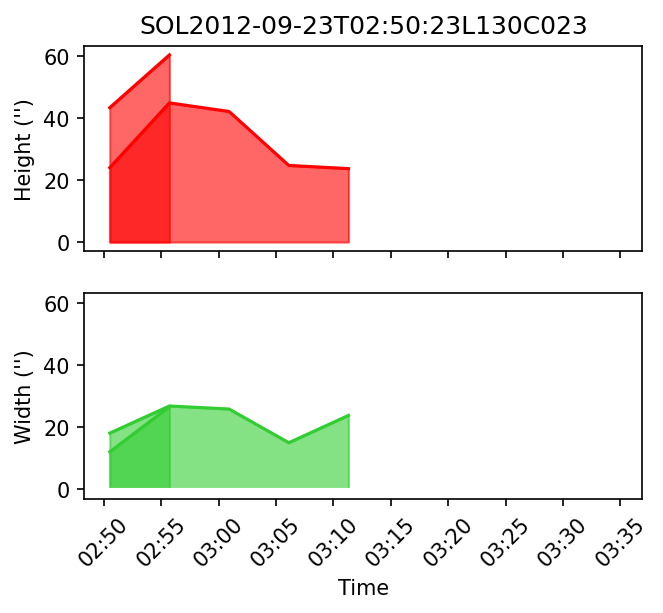

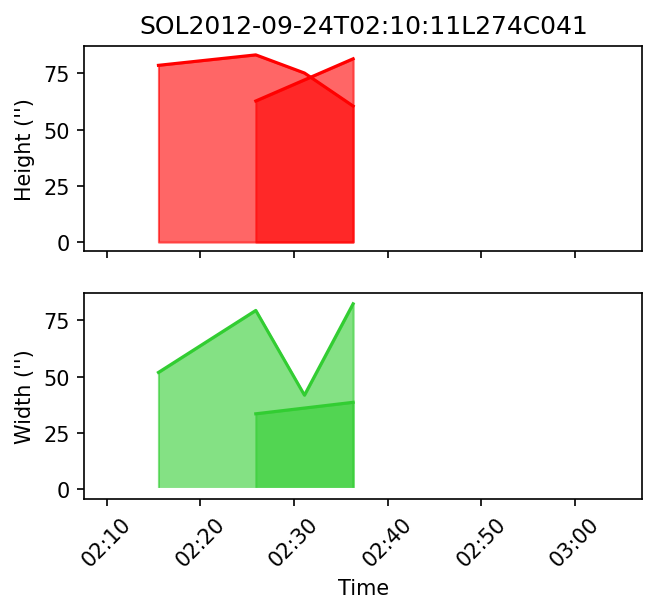

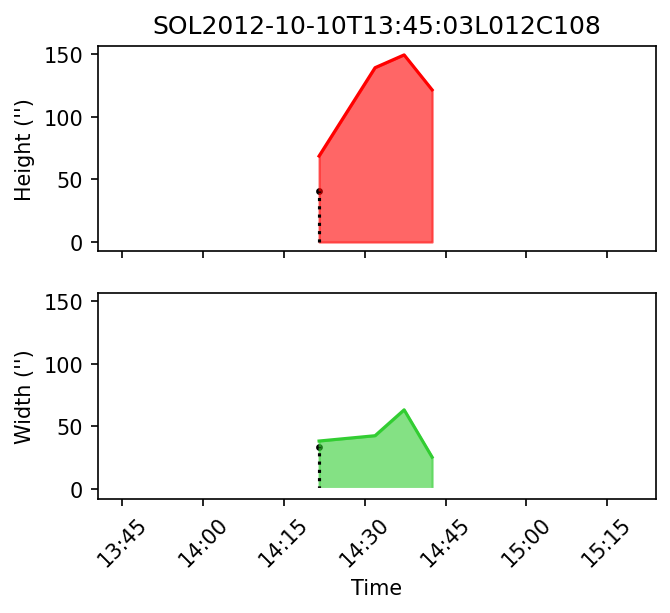

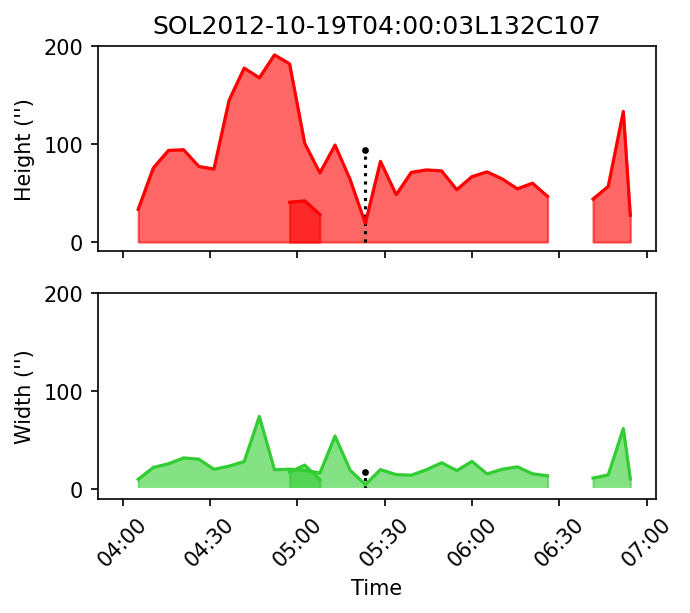

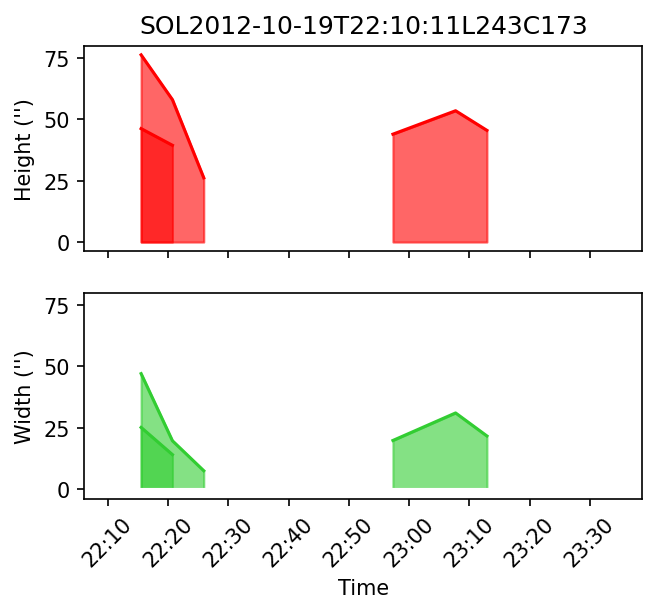

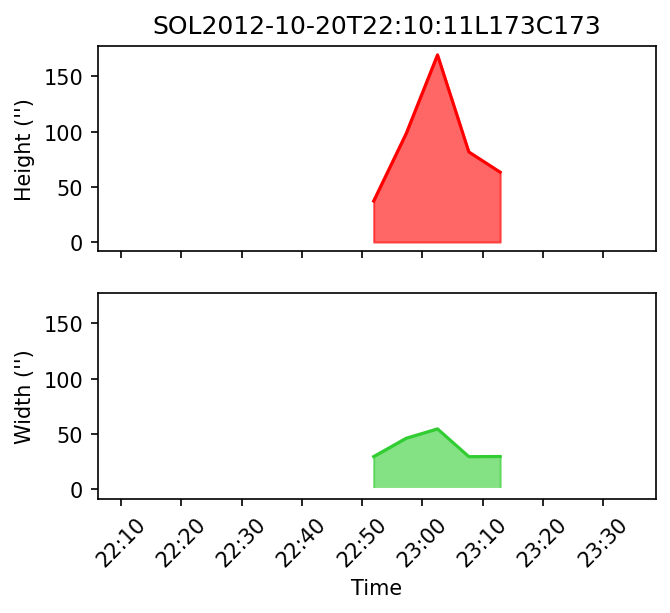

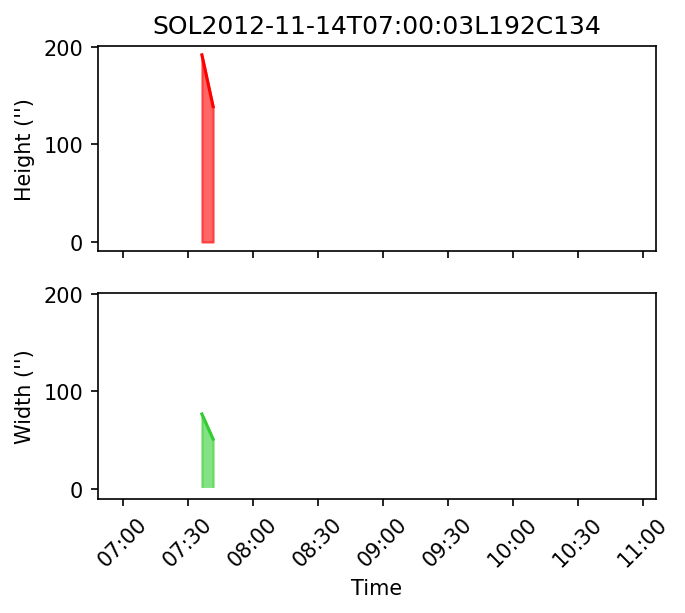

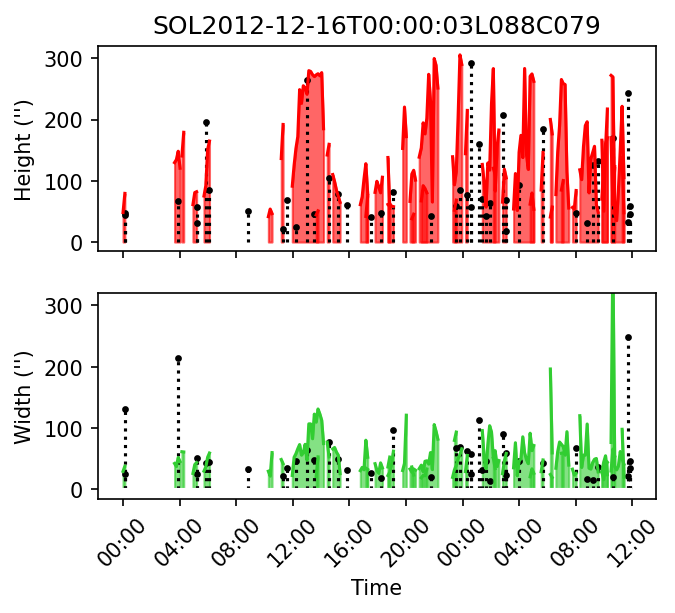

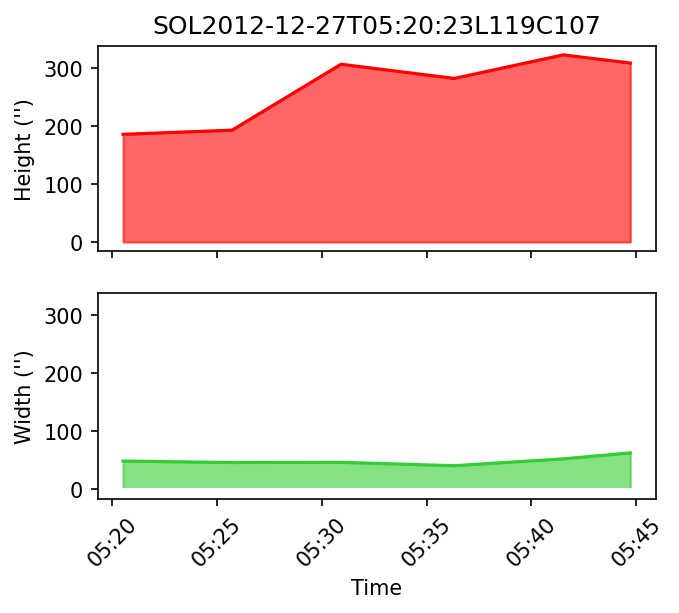

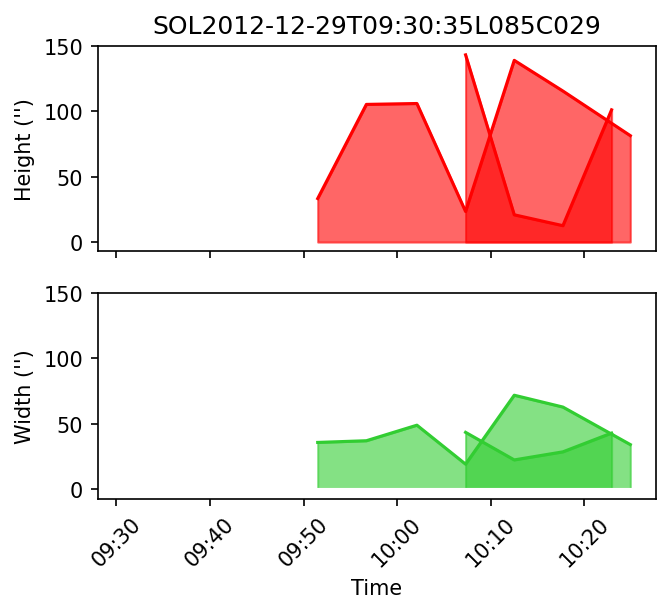

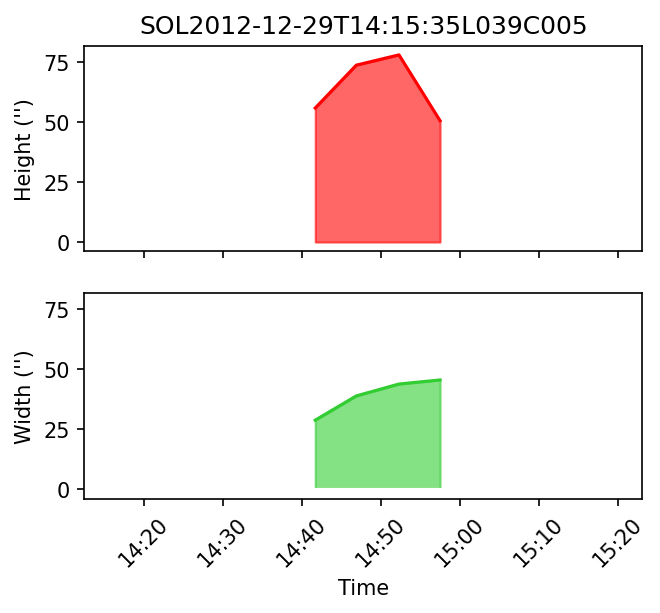

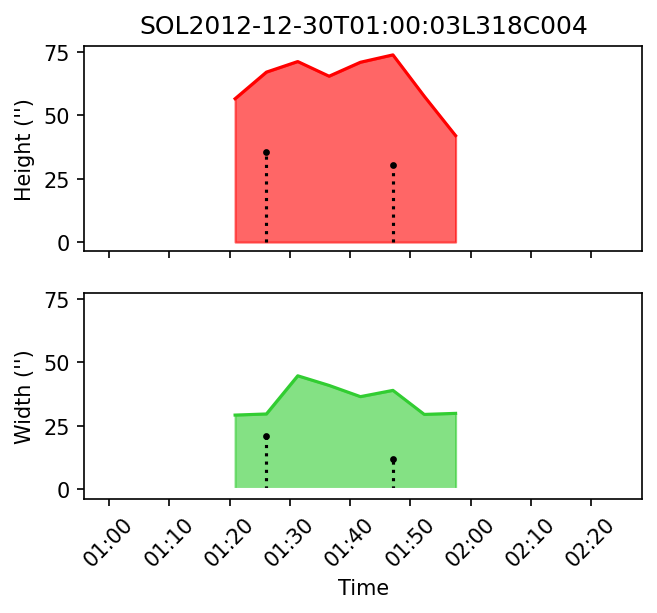

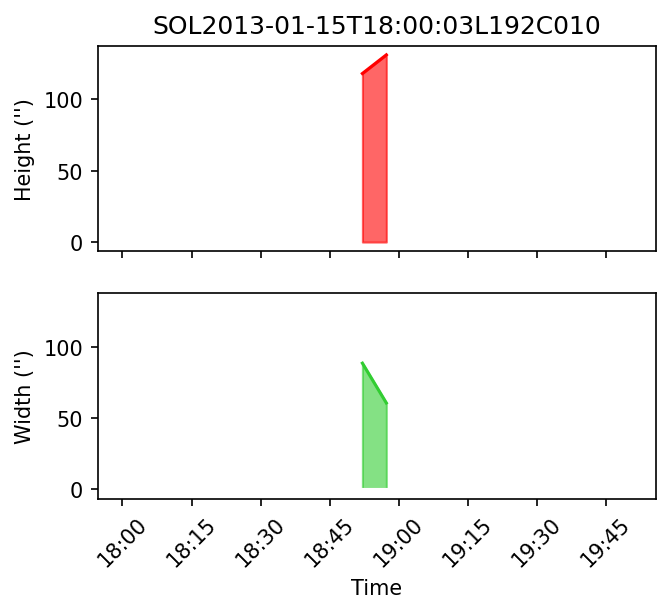

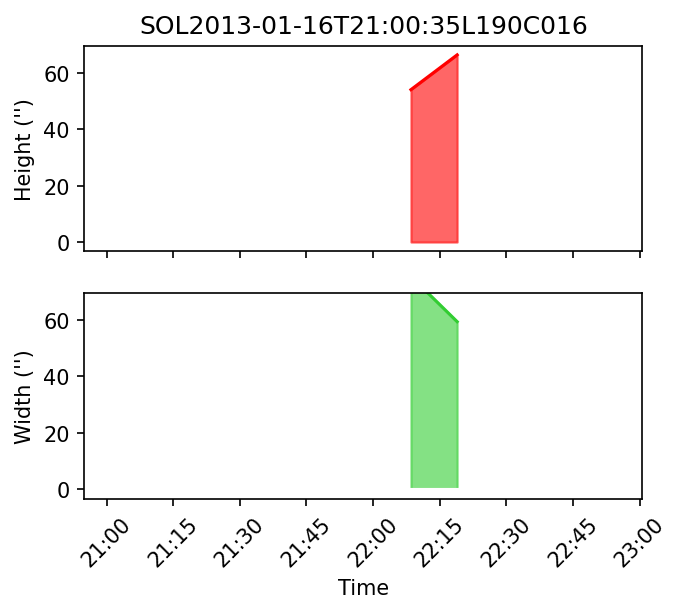

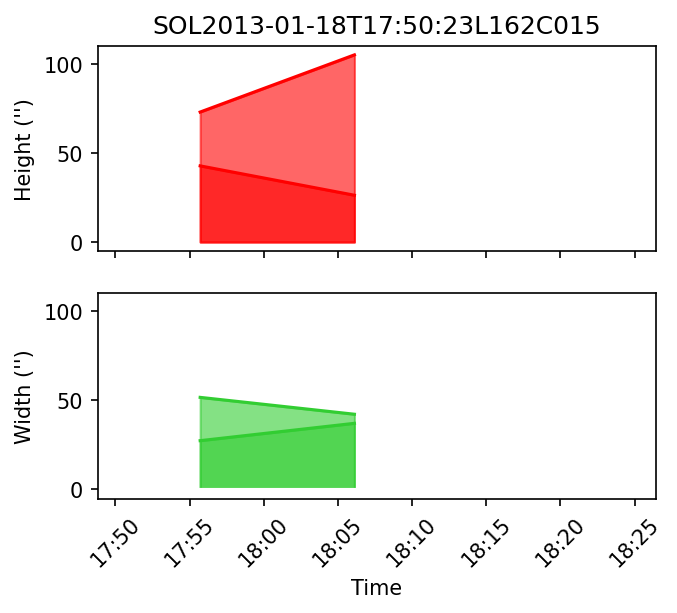

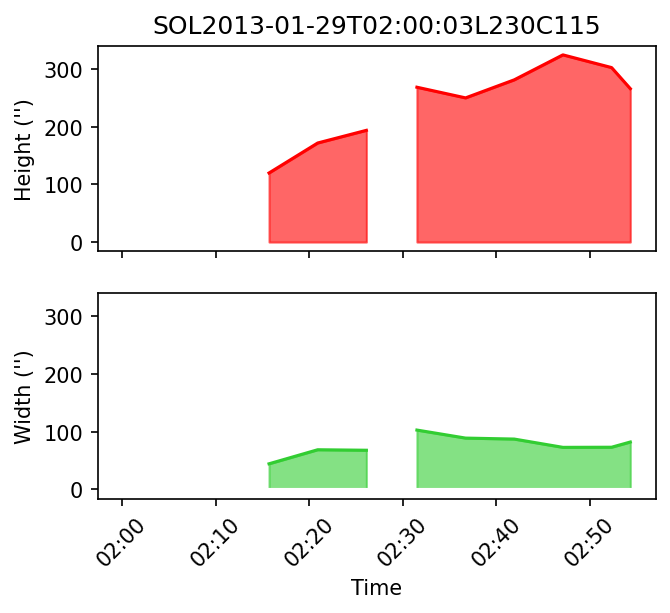

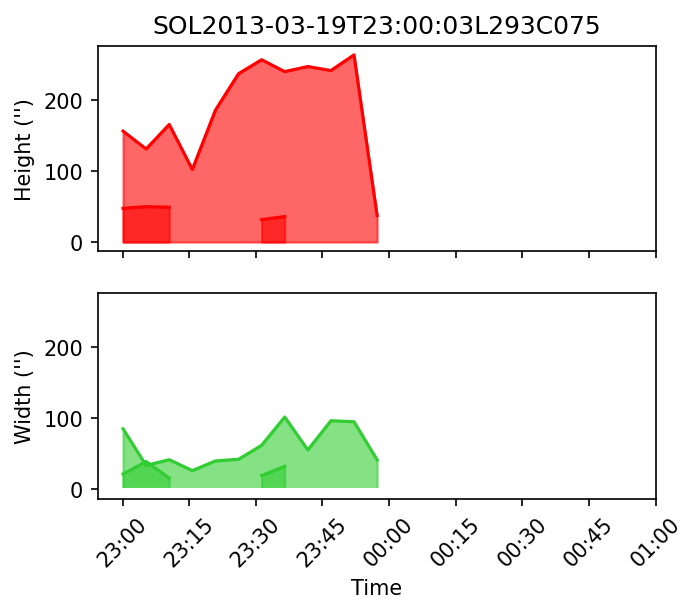

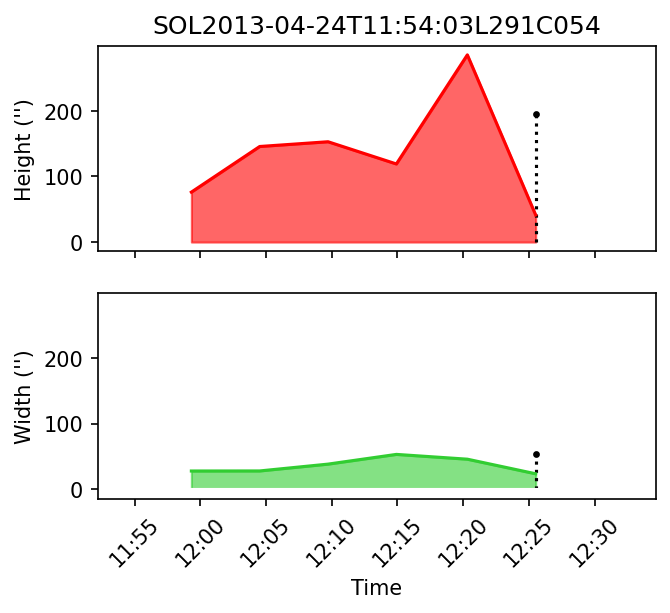

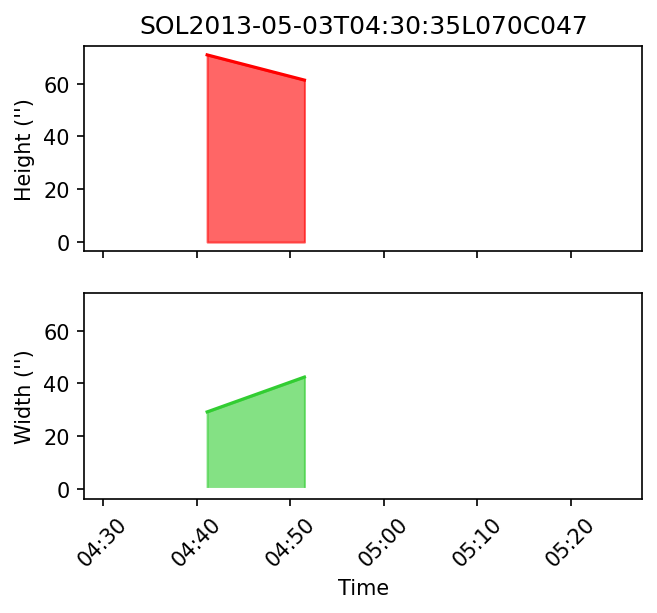

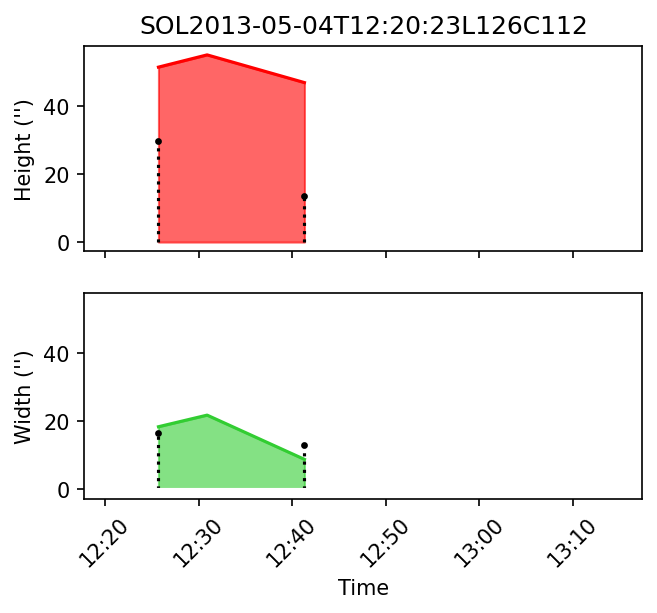

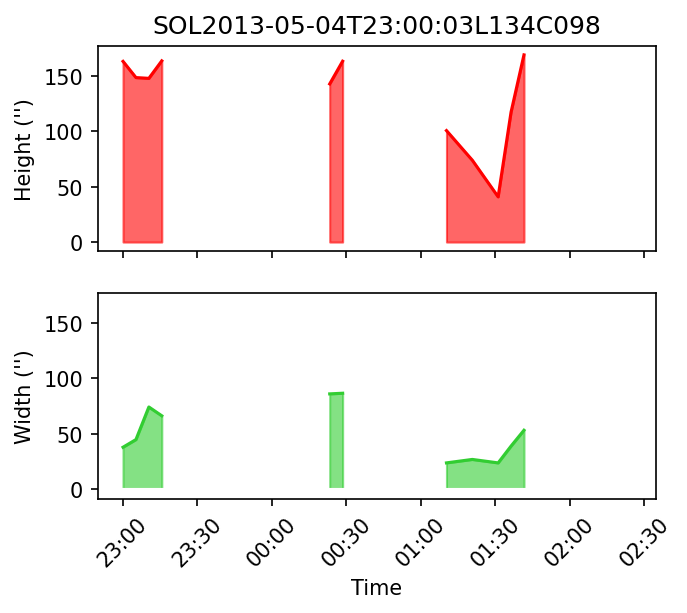

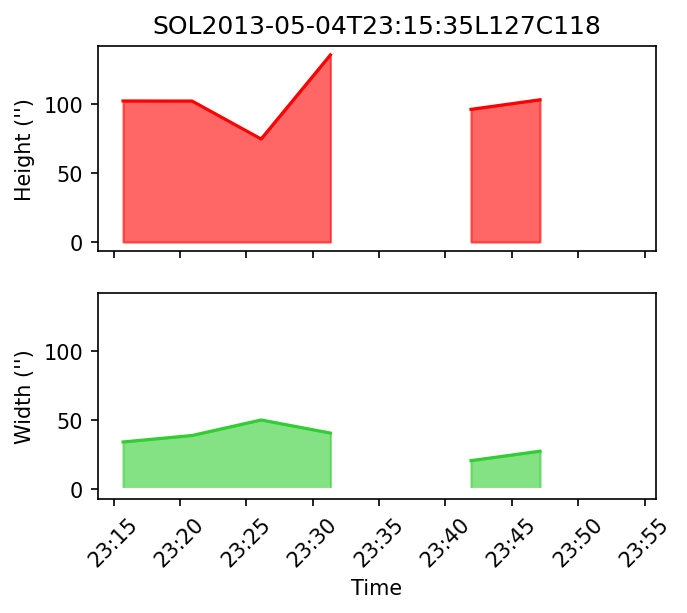

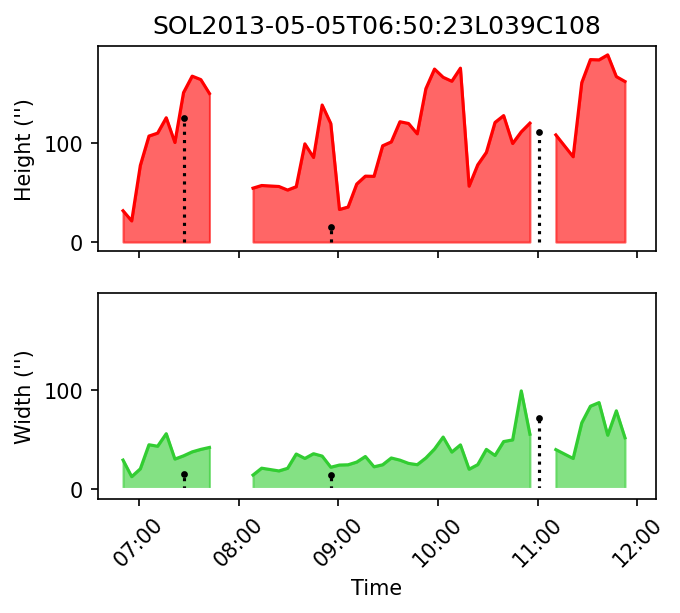

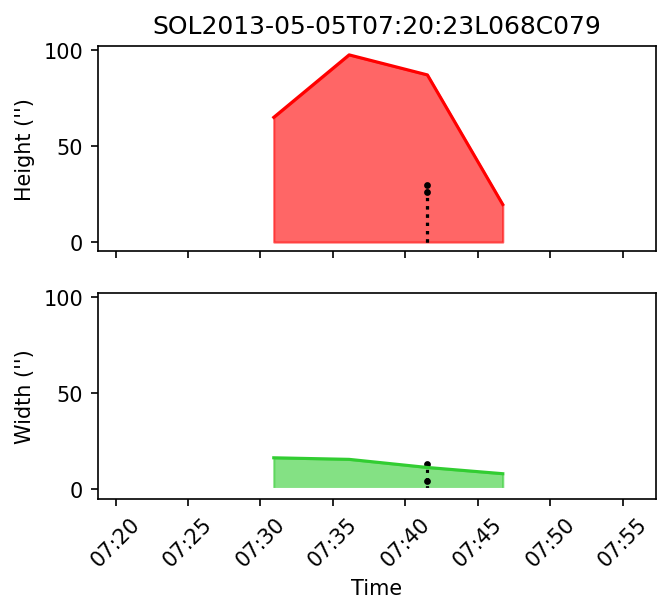

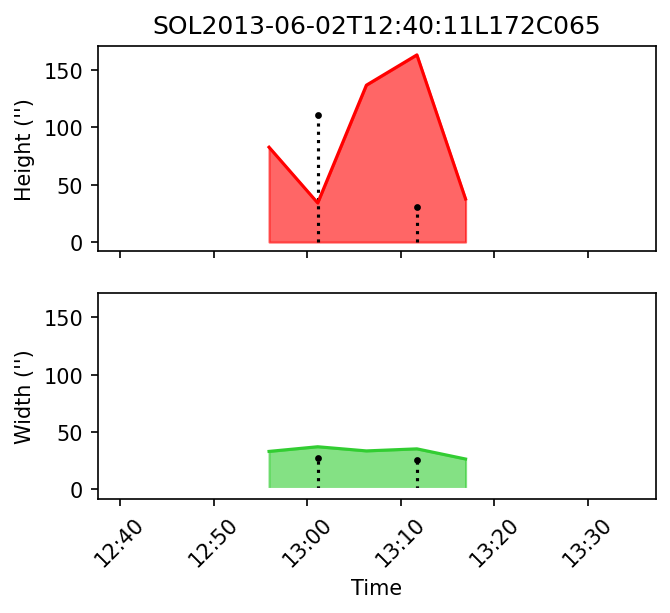

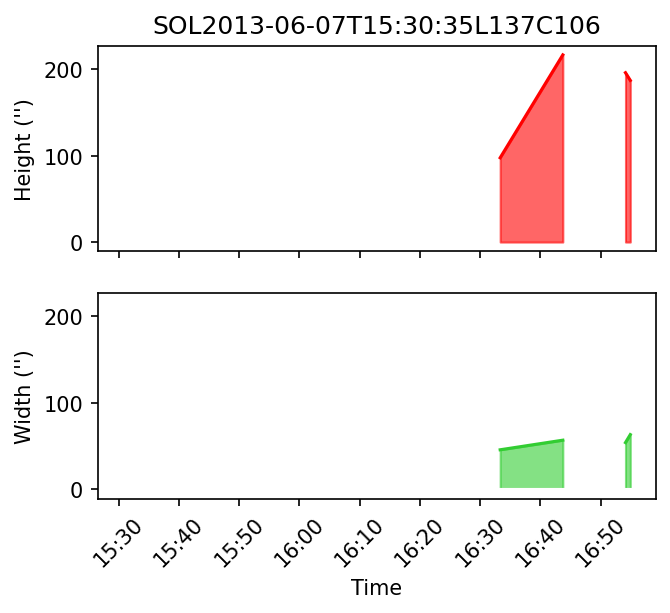

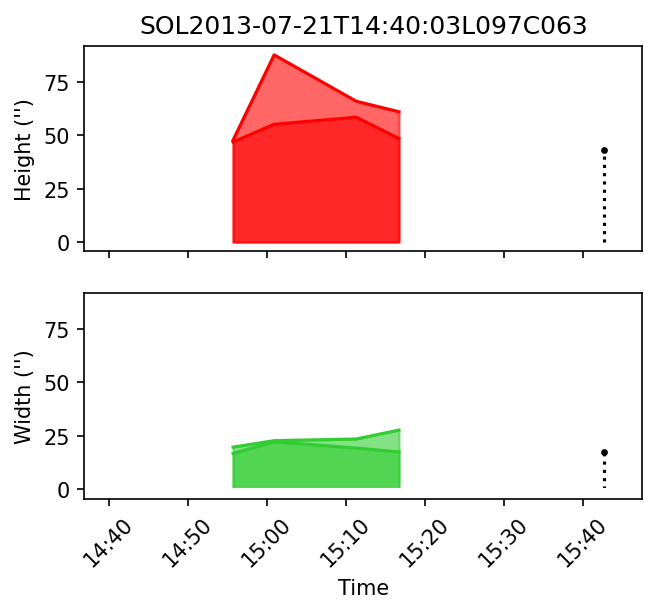

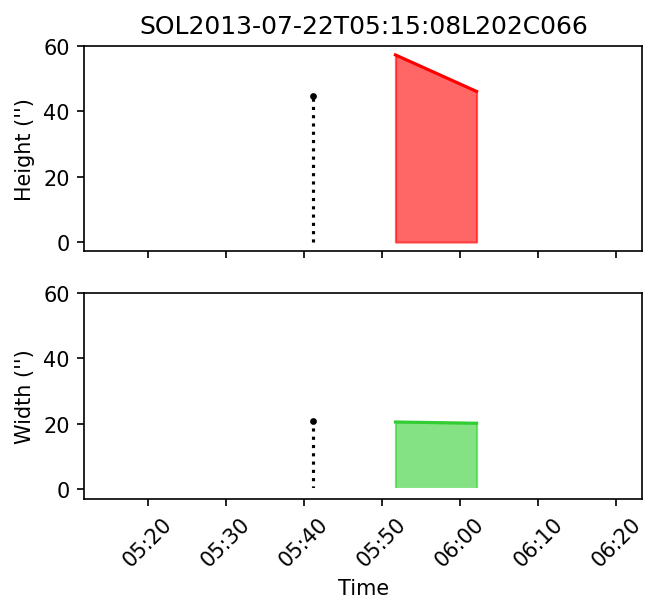

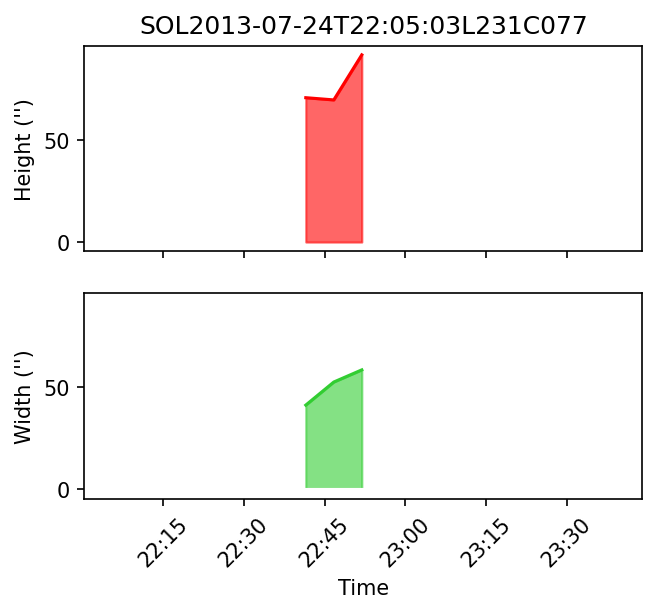

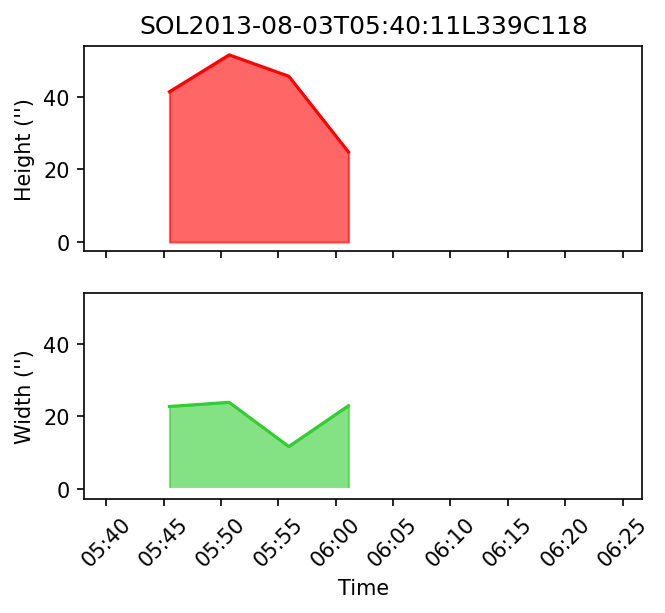

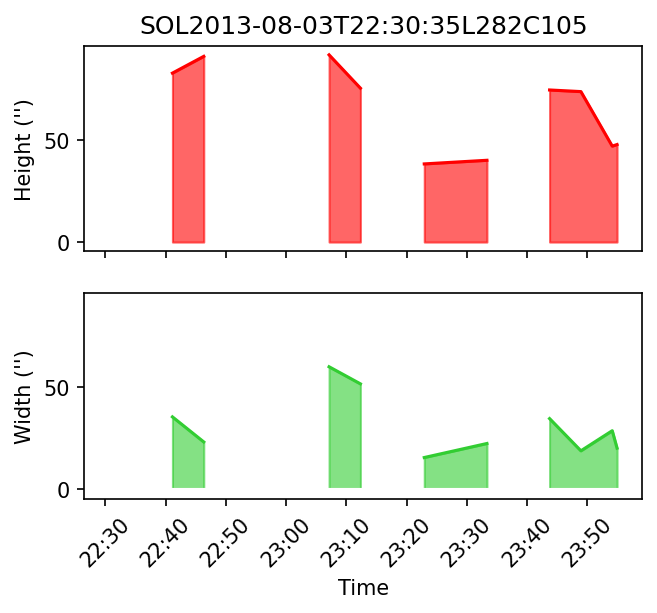

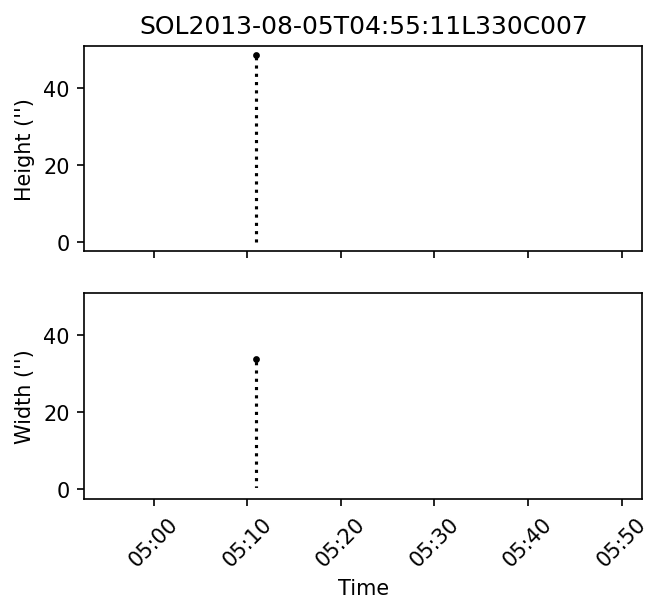

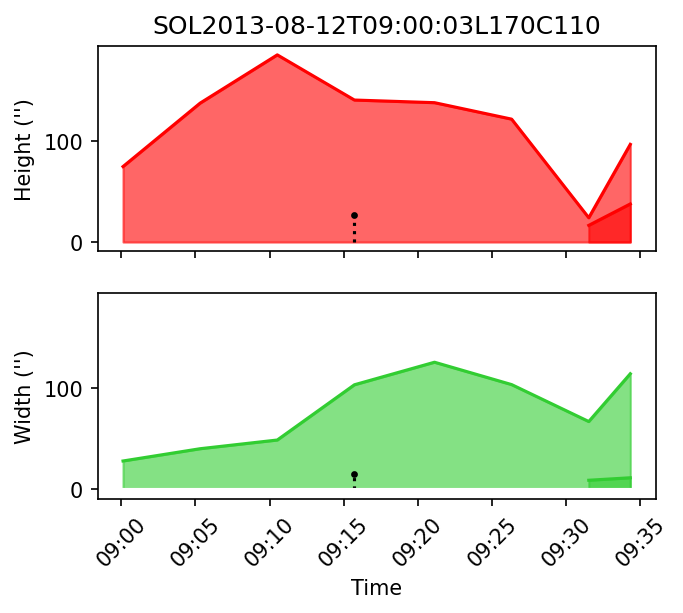

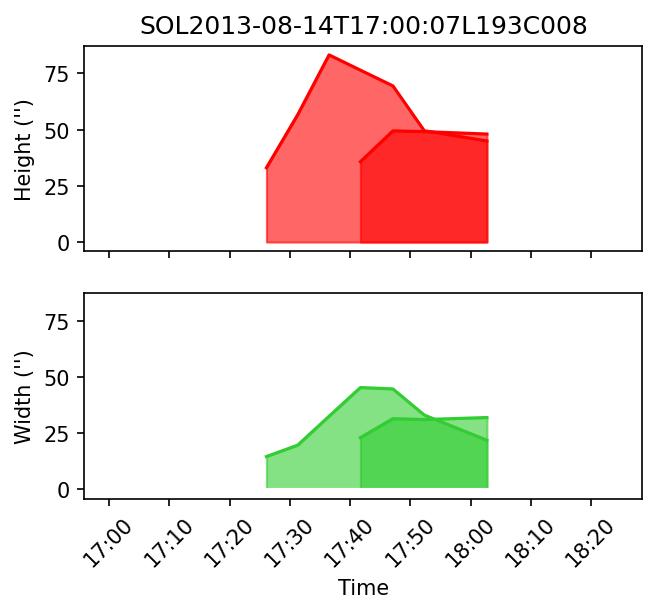

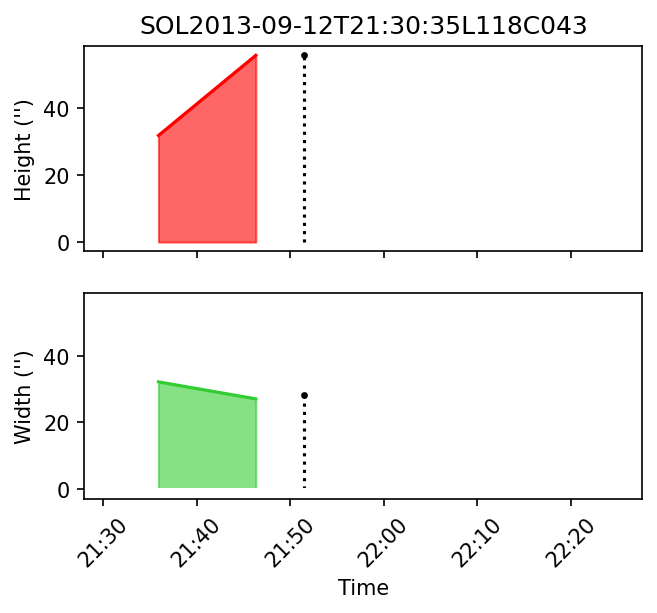

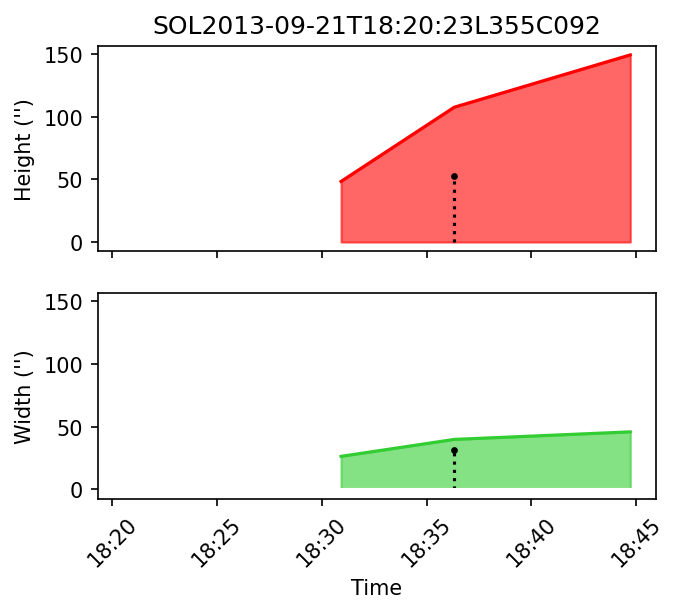

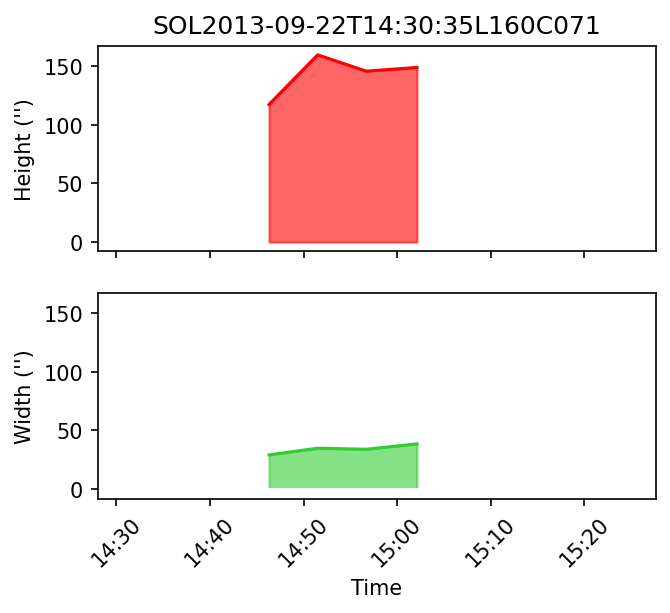

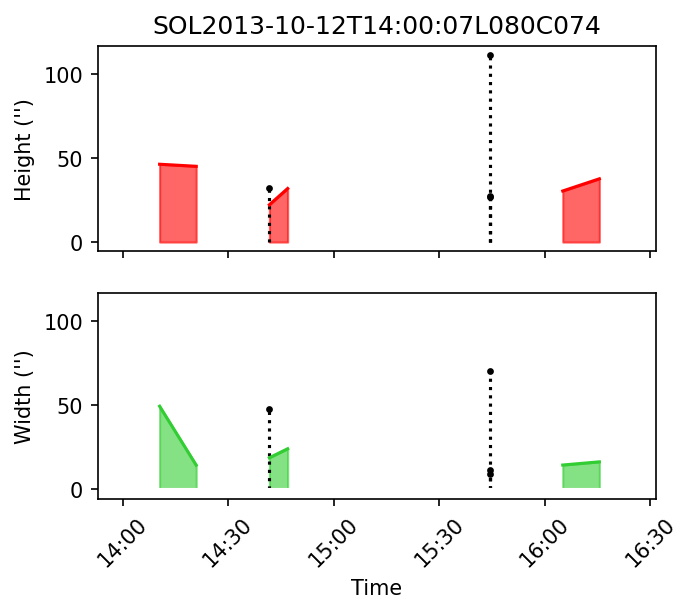

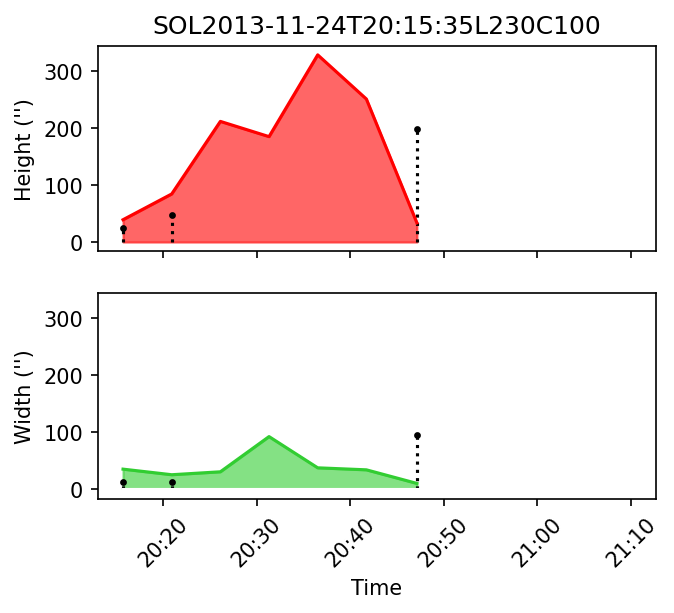

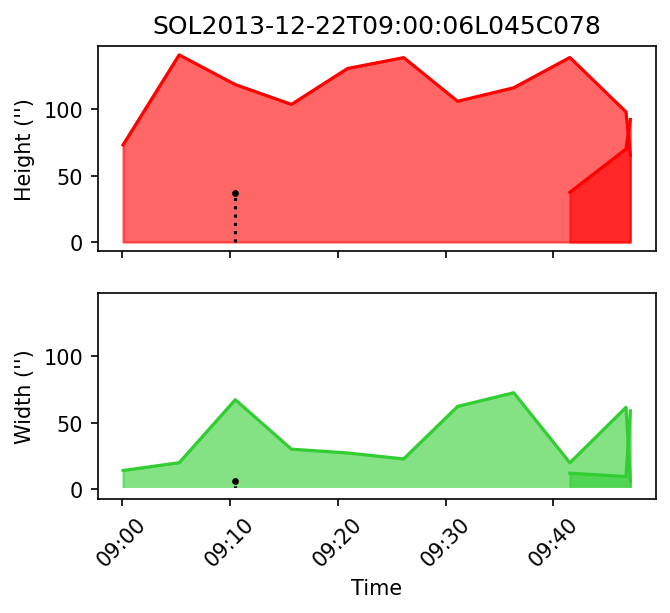

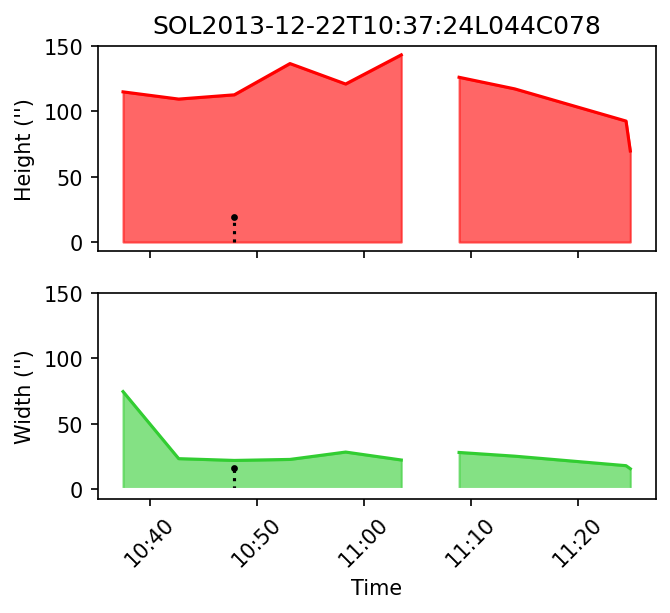

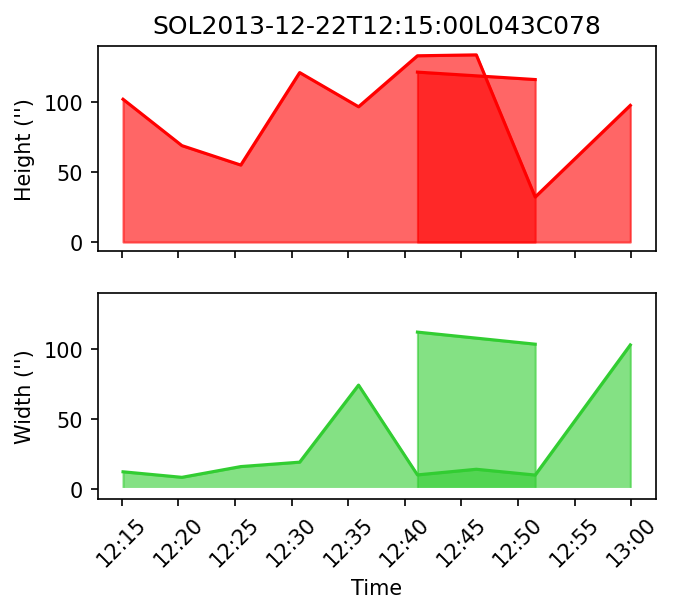

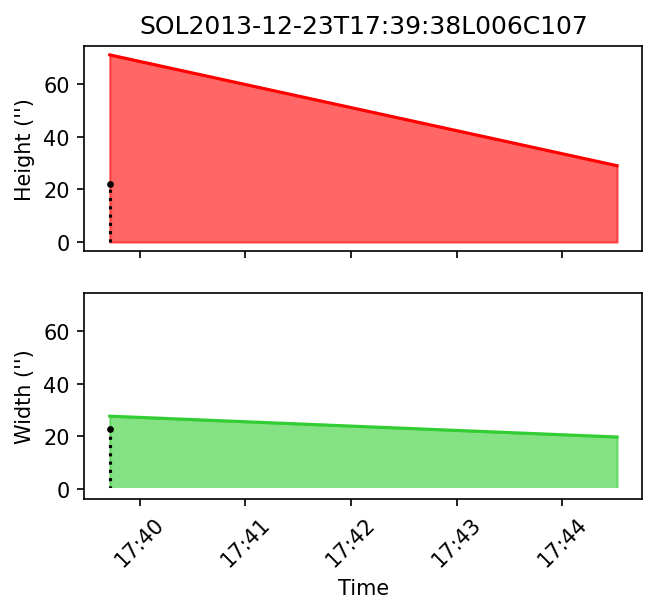

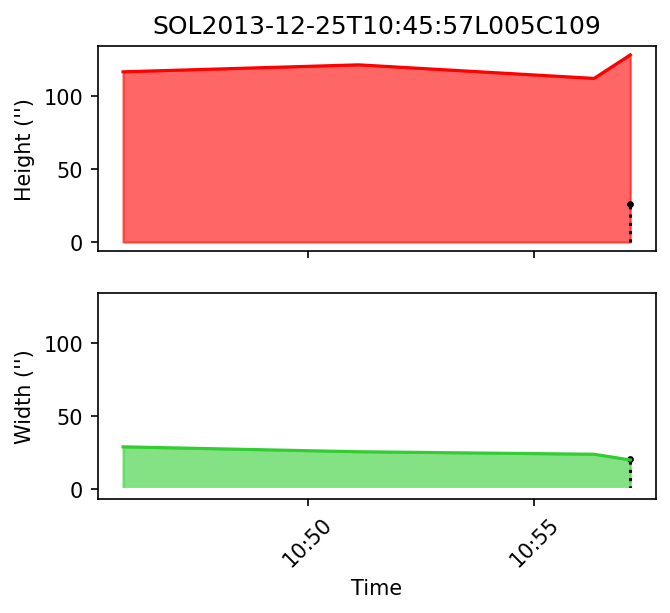

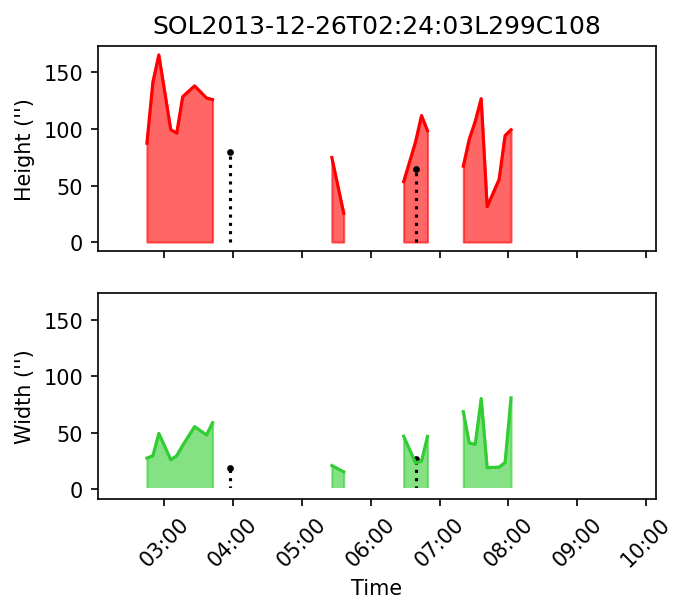

In [10]:
Cluster_SOL= np.array([Jet_clusters[i].SOL for i in range(len(Jet_clusters))],dtype=str)
for s in metafile.SOL_unique:
    I=np.where(Cluster_SOL==s)[0]
    if len(I)==0:
        continue
    fig, (ax1, ax2) = plt.subplots(2,dpi=150,figsize=(4.8,4),sharex=True)
    sol_time=sol.get_obs_time(s)
    x2, y2 = zip(*sorted(zip(sol_time, [0]*len(sol_time))))
    ax2.plot(x2,y2,color='white')
    
    for C in Jet_clusters[I]:
        O=[jet.time for jet in C.jets]
        H=[jet.solar_H for jet in C.jets]
        W=[jet.solar_W for jet in C.jets]
        x1, y1 = zip(*sorted(zip(O, H)))
        x2, y2 = zip(*sorted(zip(O, W)))
        if len(C.jets)>1:
            ax1.plot(x1,y1,color='red')
            ax2.plot(x2,y2,color='limegreen')
            ax1.fill_between(x1, 0, y1,alpha=0.6,color='red')
            ax2.fill_between(x2, 0, y2,alpha=0.6,color='limegreen')
            
        else:
            ax1.scatter(x1,y1,s=5,c='k')
            ax1.vlines(x1,0,y1,linestyle='dotted',color='k')
            ax2.scatter(x2,y2,s=5,c='k')
            ax2.vlines(x2,0,y2,linestyle='dotted',color='k')

    ymin, ymax = ax1.get_ylim()
    ax2.set_ylim(ymin, ymax)
    date_form = DateFormatter("%H:%M")
    ax2.xaxis.set_major_formatter(date_form)
    plt.xticks(rotation=45)
    ax1.set_title(s)
    ax1.set_ylabel('Height (\'\')')
    ax2.set_ylabel('Width (\'\')')
    ax2.set_xlabel('Time')
    ax1.set_title(s)

    plt.savefig('SOL/SOL_Box_size'+'/'+s.replace(':','-')+'.png', bbox_inches='tight',dpi=300)

    plt.show()